<a id='back'></a>
# List of contents

* [Intro](#intro)
* [Step 1. Download and prepare data for analysis](#step1)
     * [1.1 Import library ](#step1.1)
     * [1.2 Data initialization](#step1.2)
         * [1.2.1 Dataframe hypotheses_df](#step1.2.1)
         * [1.2.2 Dataframe orders_df](#step1.2.2)
         * [1.2.3 Dataframe visits_df](#step1.2.3)
* [Step 2. Prioritizing Hypotheses](#step2)
     * [2.1 Apply the ICE framework to prioritize hypotheses. Sort the hypotheses in descending order of priority](#step2.1)
     * [2.2 Apply the RICE framework to prioritize hypotheses. Sort the hypotheses in descending order of priority](#step2.2)
     * [2.3 Indicates the change in priority of the hypothesis when RICE is applied to replace ICE. Provide an explanation regarding the changes](#step2.3)
* [Step 3. A/B Testing Analysis](#step3)
     * [3.1 Plot cumulative income by group. Make conclusions and assumptions](#step3.1)
     * [3.2 Plot the cumulative average order size by group. Make conclusions and assumptions](#step3.2)
     * [3.3 Describe the relative differences for group B's cumulative average order size compared to group A. Draw conclusions and assumptions](#step3.3)
     * [3.4 Plot cumulative conversions by group. Make conclusions and assumptions](#step3.4)
     * [3.5 Describe the relative differences for group B's cumulative conversion rate compared to group A. Make conclusions and assumptions](#step3.5)
     * [3.6 Calculate the conversion rate of each group as the ratio of orders to the number of visits per day. Graph the daily conversion rates of both groups and explain the differences. Make conclusions and assumptions](#step3.6)
     * [3.7 Create a scatter chart for the number of orders per user. Make conclusions and assumptions](#step3.7)
     * [3.8 Calculate the 95th and 99th percentiles for the number of orders per user. Determine the point when a data point turns into an anomaly](#step3.8)
     * [3.9 Create a scatter chart for order prices. Make conclusions and assumptions](#step3.9)
     * [3.10 Calculate the 95th and 99th percentiles for order prices. Determine the point when a data point turns into an anomaly](#step3.10)
     * [3.11 Find statistical significance of conversion differences between groups using raw data. Make conclusions and assumptions](#step3.11)
     * [3.12 Find statistical significance of differences in average order size between groups using raw data. Make conclusions and assumptions](#step3.12)
     * [3.13 Find the statistical significance of conversion differences between groups using filtered data. Make conclusions and assumptions](#step3.13)
     * [3.14 Find the statistical significance of differences in average order sizes between groups using filtered data. Make conclusions and assumptions](#step3.14)
     * [3.15 Make decisions based on test results. Possible decisions are: 1. Stop testing, and consider one of the groups as a leader. 2. Stop testing, and conclude that there is no difference between the two groups. 3. Continuing testing](#step3.15)

<a id='intro'></a>
## Introduction

**Project description**
<br>**Context**
<br>You are a data analyst at a large online store. You and your marketing team have compiled a list of hypotheses to help increase revenue.
<br>Well, your job is to prioritize these hypotheses, run A/B testing, and analyze the results.

<br>**Data Description**
<br>1. Data used in the first part of the project
<br>/datasets/hypotheses_us.csv Download dataset
<br>Hypotheses — a brief description of the hypothesis
<br>Reach — user reach, on a scale of one to ten
<br>Impact — impact on users, on a scale of one to ten
<br>Confidence — belief in a hypothesis, on a scale of one to ten
<br>Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource intensive the test is.

<br>2. Data used in the second part of the project
<br> /datasets/orders_us.csv Download dataset
<br>transactionId — Order ID
<br>visitorId — ID of the user who made the order
<br>date — the date the order was created
<br>revenue — revenue from orders
<br>group — the A/B test group the user belongs to

<br>/datasets/visits_us.csv Download dataset
<br>date — date
<br>group — A/B test group
<br>visitors — the number of visitors on the specified date in the specified A/B test group
<br>visits — the number of visits on the specified date for the specified A/B test group

<br>Make sure to pre-process the data first, OK? It is possible that the original dataset you have contains errors; for example, some visitors may be in group A or group B.

<a id='step1'></a>
## Step 1. Download and prepare data for analysis
<a id='step1.1'></a>
### 1.1 Import libraries

In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import levene
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns


<a id='step1.2'></a>
### 1.2 Data initialization

In [2]:
hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders_df = pd.read_csv('/datasets/orders_us.csv')
visits_df = pd.read_csv('/datasets/visits_us.csv')

<a id='step1.2.1'></a>
#### 1.2.1 Dataframe hypotheses_df

Show general information

In [3]:
hypotheses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


Display the contents of the dataframe

In [4]:
hypotheses_df

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Displays the contents of the 'Hypothesis' column without being truncated

In [5]:
pd.set_option('display.max_colwidth', None)  # Set options for displaying long text
hypotheses_df

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


<a id='step1.2.1.1'></a>
##### 1.2.1.1 Preprocessing Dataframe hypotheses_df

Rename columns to lowercase

In [6]:
hypotheses_df.columns = hypotheses_df.columns.str.lower()

Check results

In [7]:
hypotheses_df.columns


Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Check for missing values

In [8]:
hypotheses_df.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

Check for duplicate data

In [9]:
hypotheses_df.duplicated().sum()

0

**Conclusion:**

From the analysis of the `hypotheses_df` data frame, several important points can be concluded:

1. Data has been successfully read from the CSV file and consists of 9 rows and 5 columns.

2. The names of the columns in the data frame have been changed to lowercase.

3. There are no missing values in the data frame, all columns have complete data.

4. There is no duplicate data in the data frame, all rows of data are unique.

This data frame is ready to be used for further analysis and data processing.

<a id='step1.2.2'></a>
#### 1.2.2 Dataframe orders_df

Show general information

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


Display the contents of the dataframe

In [11]:
orders_df

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


<a id='step1.2.2.1'></a>
##### 1.2.2.1 Preprocessing Dataframe orders_df

Change the "group" column to the category data type using the .astype('category') method

In [12]:
orders_df['group'] = orders_df['group'].astype('category')

Check results

In [13]:
orders_df['group'].unique()

['B', 'A']
Categories (2, object): ['A', 'B']

Rename the "transactionId" column to "transaction_id" and "visitorId" to "visitor_id" using the .rename() method

In [14]:
orders_df = orders_df.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

Check results

In [15]:
orders_df.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Changed the orders_df['date'] column to the datetime data type

In [16]:
orders_df['date'] = pd.to_datetime(orders_df['date'])

Check results

In [17]:
orders_df

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [18]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


Check for missing values

In [19]:
orders_df.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Check for duplicate data

In [20]:
orders_df.duplicated().sum()

0

Filter `visitor_id` which is in groups A and B

In [21]:
# Look for visitor_id in both groups
visitor_both_groups = orders_df.groupby('visitor_id')['group'].nunique()
visitor_both_groups = visitor_both_groups[visitor_both_groups == 2].index

# Displays results
result_df = orders_df[orders_df['visitor_id'].isin(visitor_both_groups)]
result_df

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
20,2904772834,963407295,2019-08-15,5.6,B
23,4252514150,351125977,2019-08-15,235.6,B
24,1162046357,3234906277,2019-08-15,120.2,B
26,2223239646,199603092,2019-08-15,55.7,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,20.8,B
1183,1458356232,963407295,2019-08-14,80.0,A
1184,1329499668,2949041841,2019-08-14,160.7,B
1189,4082620617,393266494,2019-08-14,490.4,B


Delete `visitor_id` in groups A and B

In [22]:
# Remove rows from orders_df based on result_df index
orders_df = orders_df.drop(result_df.index)

# Displays results
orders_df

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


Counts the number of times the values "A" and "B" appear in the "group" column of the orders_df DataFrame using the .value_counts() method

In [23]:
group_counts_orders_df = orders_df['group'].value_counts()
group_counts_orders_df

group
B    548
A    468
Name: count, dtype: int64

**Conclusion:**

From the analysis of the `orders_df` data frame, here are some important points:

1. Data Frame Info:
    - The `orders_df` data frame consists of 1197 rows and 5 columns.
    - Columns 'transactionId' and 'visitorId' have data type 'int64'.
    - The 'date' column has the data type 'object', which may refer to a date.
    - Column 'revenue' has data type 'float64'.
    - The 'group' column has been changed to the category data type ('category').

2. Change in Column 'group' Data Type:
    - The 'group' column has been changed to the category data type ('category').

3. Changes to the Data Type of the 'date' Column:
    - The 'date' column has been changed to the datetime data type.
   
4. No Missing Value:
    - There are no missing values in the data frame, all columns have complete data.

5. No Duplicated Data:
    - There is no duplicate data in the data frame, all rows of data are unique.

6. Delete `visitor_id` in groups A and B:
    - The `orders_df` dataframe no longer has duplicate `visitor_id` in groups A and B.

7. Number of Data in Each Group ('group'):
    - Total data for group 'A' = 548 and 'B' = 468.

Furthermore, the data frame `orders_df` has changed the name of the column 'transactionId' to 'transaction_id' and 'visitorId' to 'visitor_id' to facilitate further use in analysis. This data frame is ready to be used for further analysis related to transactions and visitors.

<a id='step1.2.3'></a>
#### 1.2.3 Dataframe visits_df

Show general information

In [24]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Display the contents of the dataframe

In [25]:
visits_df

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<a id='step1.2.3.1'></a>
##### 1.2.3.1 Preprocessing Dataframe visits_df

Change the "group" column to the category data type using the .astype('category') method

In [26]:
visits_df['group'] = visits_df['group'].astype('category')

Check results

In [27]:
visits_df['group'].unique()

['A', 'B']
Categories (2, object): ['A', 'B']

Changed the orders_df['date'] column to the datetime data type

In [28]:
visits_df['date'] = pd.to_datetime(visits_df['date'])

Check results

In [29]:
visits_df

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [30]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


Check for missing values

In [31]:
visits_df.isna().sum()

date      0
group     0
visits    0
dtype: int64

Check for duplicate data

In [32]:
visits_df.duplicated().sum()

0

Filters the number of `visits` columns based on the `result_df` dataframe
<br>Create `group_a_df` dataframe for group A

In [33]:
# Filter DataFrame for group=A
group_a_df = result_df[result_df['group'] == 'A'][['date', 'group']]

# Added 'count_date' column
group_a_df['count_date_a'] = group_a_df.groupby('date')['date'].transform('count')

# Display results by retaining 'count_date'
group_a_df = group_a_df[['date', 'group', 'count_date_a']].drop_duplicates()

# Displays results
group_a_df


,date,group,count_date_a
2,2019-08-15,A,5
114,2019-08-01,A,1
117,2019-08-22,A,6
179,2019-08-17,A,4
197,2019-08-02,A,1
200,2019-08-23,A,5
249,2019-08-18,A,4
304,2019-08-28,A,2
370,2019-08-24,A,2
375,2019-08-25,A,2


Create a `group_b_df` dataframe for group B

In [34]:
# Filter DataFrame for group=A
group_b_df = result_df[result_df['group'] == 'B'][['date', 'group']]

# Added 'count_date' column
group_b_df['count_date_b'] = group_b_df.groupby('date')['date'].transform('count')

# Display results by retaining 'count_date'
group_b_df = group_b_df[['date', 'group', 'count_date_b']].drop_duplicates()

# Displays results
group_b_df

,date,group,count_date_b
20,2019-08-15,B,5
60,2019-08-16,B,2
71,2019-08-01,B,4
85,2019-08-22,B,4
189,2019-08-17,B,1
246,2019-08-02,B,1
252,2019-08-23,B,2
263,2019-08-18,B,2
310,2019-08-03,B,2
327,2019-08-28,B,6


Created a new column `visits copy` in the `visits df` dataframe as a benchmark

In [35]:
visits_df['visits_copy'] = visits_df['visits']

# Displays results
visits_df

,date,group,visits,visits_copy
0,2019-08-01,A,719,719
1,2019-08-02,A,619,619
2,2019-08-03,A,507,507
3,2019-08-04,A,717,717
4,2019-08-05,A,756,756
...,...,...,...,...
57,2019-08-27,B,720,720
58,2019-08-28,B,654,654
59,2019-08-29,B,531,531
60,2019-08-30,B,490,490


Reduce `visits` with `group_a_df` dataframe

In [36]:
# Merge DataFrames based on 'date' and 'group' columns
merged_ab_df = pd.merge(visits_df, group_a_df, on=['date', 'group'], how='left')

# Replace NaN with 0 in column 'count_date_a'
merged_ab_df['count_date_a'] = merged_ab_df['count_date_a'].fillna(0).astype(int)

# Calculates the 'visits' column based on conditions
merged_ab_df['visits'] = merged_ab_df['visits_copy'] - merged_ab_df['count_date_a']

# Displays results
merged_ab_df

,date,group,visits,visits_copy,count_date_a
0,2019-08-01,A,718,719,1
1,2019-08-02,A,618,619,1
2,2019-08-03,A,507,507,0
3,2019-08-04,A,712,717,5
4,2019-08-05,A,753,756,3
...,...,...,...,...,...
57,2019-08-27,B,720,720,0
58,2019-08-28,B,654,654,0
59,2019-08-29,B,531,531,0
60,2019-08-30,B,490,490,0


Reduce `visits` with `group_b_df` dataframe

In [37]:
# Create a new column 'visits_copy'
merged_ab_df['visits_copy_2'] = merged_ab_df['visits']

# Merge DataFrames based on 'date' and 'group' columns
merged_ab_df = pd.merge(merged_ab_df, group_b_df, on=['date', 'group'], how='left')

# Replace NaN with 0 in column 'count_date_b'
merged_ab_df['count_date_b'] = merged_ab_df['count_date_b'].fillna(0).astype(int)

# Calculates the 'visits' column based on conditions
merged_ab_df['visits'] = merged_ab_df['visits_copy_2'] - merged_ab_df['count_date_b']

# Displays results
merged_ab_df

,date,group,visits,visits_copy,count_date_a,visits_copy_2,count_date_b
0,2019-08-01,A,718,719,1,718,0
1,2019-08-02,A,618,619,1,618,0
2,2019-08-03,A,507,507,0,507,0
3,2019-08-04,A,712,717,5,712,0
4,2019-08-05,A,753,756,3,753,0
...,...,...,...,...,...,...,...
57,2019-08-27,B,715,720,0,720,5
58,2019-08-28,B,648,654,0,654,6
59,2019-08-29,B,526,531,0,531,5
60,2019-08-30,B,487,490,0,490,3


Apply deduplicated `visits` to the `visits_df` dataframe

In [38]:
visits_df['visits'] = merged_ab_df['visits']

Check the results

In [39]:
visits_df

,date,group,visits,visits_copy
0,2019-08-01,A,718,719
1,2019-08-02,A,618,619
2,2019-08-03,A,507,507
3,2019-08-04,A,712,717
4,2019-08-05,A,753,756
...,...,...,...,...
57,2019-08-27,B,715,720
58,2019-08-28,B,648,654
59,2019-08-29,B,526,531
60,2019-08-30,B,487,490


The `visits` column has been updated based on the reduction of duplicate visitor_ids in groups A and B

Counts the number of times the values "A" and "B" appear in the "group" column of the visits_df DataFrame using the .value_counts() method

In [40]:
group_counts_visits_df = visits_df['group'].value_counts()
group_counts_visits_df

group
A    31
B    31
Name: count, dtype: int64

Counting the number of visits for each value "A" and "B" in the "group" column

In [41]:
grouped_visits = visits_df.groupby('group')['visits'].sum()
grouped_visits

C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_11140\651003675.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_visits = visits_df.groupby('group')['visits'].sum()


group
A    18647
B    18824
Name: visits, dtype: int64

**Conclusion:**

From the analysis of the `visits_df` data frame, here are several important points:

1. Data Frame Info:
    - The `visits_df` data frame consists of 62 rows and 3 columns.
    - Columns 'date' and 'group' have data type 'object'.
    - Column 'visits' has data type 'int64'.

2. Change in Column 'group' Data Type:
    - The 'group' column has been changed to the category data type ('category').
   
3. Changes to the Data Type of the 'date' Column:
    - The 'date' column has been changed to the datetime data type.
   
4. No Missing Value:
    - There are no missing values in the data frame, all columns have complete data.

5. No Duplicated Data:
    - There is no duplicate data in the data frame, all rows of data are unique.

6. Reduce `visits_df['visits']` with `merged_ab_df['visits']` which are duplicates in groups A and B:
    - The `visits_df['visits']` column has been reduced by duplicate `visits` in groups A and B.

7. Number of Data in Each Group ('group'):
    - There are two groups, 'A' and 'B', with a total of 31 data each.
   
8. Number of visits in each group ('group'):
    - Number of visits for group 'A' = 18647 and 'B' = 18824.

The `visits_df` data frame contains information about visits on specific dates in groups 'A' and 'B'. The 'group' column is a categorical column with two categories that may refer to the test groups (A and B) in the experiment or analysis being performed. This data frame is ready to be used for further analysis related to visits on a specific date.

<a id='step2'></a>
## Step 2. Prioritize Hypotheses
<a id='step2.1'></a>
### 2.1 Apply the ICE framework to prioritize hypotheses. Sort the hypotheses in descending order of priority

The ICE (Impact, Confidence, Effort) framework is a tool used to prioritize hypotheses based on potential impact, level of confidence, and effort required. To order hypotheses by ICE value, you can calculate the ICE score for each hypothesis and then sort them in descending order of priority. The ICE score is calculated using the following formula:

ICE = (Impact × Confidence) / Effort

You have provided hypothesis data in the data frame hypotheses_df with columns 'Impact', 'Confidence', and 'Effort'. Below is the calculation of the ICE score for each hypothesis and sorting based on the ICE value from highest to lowest:

In [42]:
# Calculates the ICE score for each hypothesis
hypotheses_df['ICE'] = (hypotheses_df['impact'] * hypotheses_df['confidence']) / hypotheses_df['effort']

# Sorts hypotheses by ICE score in descending order
hypotheses_df.sort_values(by='ICE', ascending=False)[['hypothesis', 'ICE']]

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


Added 'rank_ICE' column into 'hypotheses_df' dataframe to show ranking based on 'ICE' values

In [43]:
hypotheses_df['rank_ICE'] = hypotheses_df['ICE'].rank(ascending=False, method='first').astype(int)

Sorts hypotheses based on ICE scores in descending order

In [44]:
hypotheses_df.sort_values(by='ICE', ascending=False)[['hypothesis', 'ICE', 'rank_ICE']]

,hypothesis,ICE,rank_ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000,1
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,2
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000,3
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000,4
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000,5
1,Launch your own delivery service. This will shorten delivery time,2.000000,6
5,Add a customer review page. This will increase the number of orders,1.333333,7
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000,8
4,Change the background color on the main page. This will increase user engagement,1.000000,9


<a id='step2.2'></a>
### 2.2 Apply the RICE framework to prioritize hypotheses. Sort the hypotheses in descending order of priority

The RICE (Reach, Impact, Confidence, Effort) framework is a tool used to prioritize hypotheses based on potential impact, level of confidence, effort required, and reach of influence. To order hypotheses by RICE value, you can calculate the RICE score for each hypothesis and then sort them in descending order of priority. The RICE score is calculated using the following formula:

RICE = (Reach × Impact × Confidence) / Effort

You have provided hypothesis data in the data frame hypotheses_df with columns 'Reach', 'Impact', 'Confidence', and 'Effort'. Below is the calculation of the RICE score for each hypothesis and sorting based on the RICE value from highest to lowest:

In [45]:
# Calculates the RICE score for each hypothesis
hypotheses_df['RICE'] = (hypotheses_df['reach'] * hypotheses_df['impact'] * hypotheses_df['confidence']) / hypotheses_df['effort']

# Sorts hypotheses based on RICE scores in descending order
hypotheses_df.sort_values(by='RICE', ascending=False)[['hypothesis', 'RICE']]

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


Added 'rank_RICE' column into 'hypotheses_df' dataframe to show ranking based on 'RICE' values

In [46]:
hypotheses_df['rank_RICE'] = hypotheses_df['RICE'].rank(ascending=False, method='first').astype(int)

Displays the sorted hypotheses

In [47]:
hypotheses_df.sort_values(by='RICE', ascending=False)[['hypothesis', 'RICE', 'rank_RICE']]

,hypothesis,RICE,rank_RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0,1
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0,2
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0,3
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0,4
8,Launch a promotion that gives users discounts on their birthdays,16.2,5
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0,6
1,Launch your own delivery service. This will shorten delivery time,4.0,7
5,Add a customer review page. This will increase the number of orders,4.0,8
4,Change the background color on the main page. This will increase user engagement,3.0,9


<a id='step2.3'></a>
### 2.3 Shows changes in hypothetical priorities when RICE is implemented to replace ICE. Provide an explanation regarding the changes

In [48]:
hypotheses_df

,hypothesis,reach,impact,confidence,effort,ICE,rank_ICE,RICE,rank_RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,2,40.0,3
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,6,4.0,7
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,5,56.0,2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,8,9.0,6
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,9,3.0,9
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,7,4.0,8
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,4,40.0,4
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,3,112.0,1
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,1,16.2,5


**Hypothetical Priority Changes When RICE Is Implemented to Replace ICE**

From the comparison between the priorities of the hypotheses when using the ICE and RICE metrics, a significant change in the order of priorities can be seen. The following is an explanation regarding these changes:

1. **Hypothesis 7: "Add a subscription form to all the main pages. This will help you compile a mailing list"**
    - **Priority with ICE**: 11.2 (3rd place)
    - **Priority with RICE**: 112 (1st place)
    - **Explanation**: This hypothesis received the highest rating when using RICE because it has a high 'Reach' (a value of 10), meaning that this change will affect the most users or pages. Despite having a lower ICE score, its high reach impact makes it a higher priority when using RICE.

2. **Hypothesis 2: "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size"**
    - **Priority with ICE**: 7 (5th place)
    - **Priority with RICE**: 56 (2nd place)
    - **Explanation**: This hypothesis also ranks higher when using RICE, as a high 'Reach' (a value of 8) has a significant impact on the RICE score. This suggests that range effects can change priority rankings.

3. **Hypothesis 0: "Add two new channels for attracting traffic. This will bring 30% more users"**
    - **Priority with ICE**: 13.33 (2nd place)
    - **Priority with RICE**: 40 (3rd place)
    - **Explanation**: This hypothesis still has high priority with RICE, but is lower than hypotheses 7 and 2 because it has a lower 'Reach'.

4. **Hypothesis 6: "Show banners with current offers and sales on the main page. This will increase conversion"**
    - **Priority with ICE**: 8 (4th place)
    - **Priority with RICE**: 40 (4th place)
    - **Explanation**: Like hypothesis 0, this hypothesis also remains high priority with RICE, but lower than hypotheses 7 and 2 because it has a lower 'Reach'.

5. **Hypothesis 8: "Launch a promotion that gives users discounts on their birthdays"**
    - **Priority with ICE**: 16.2 (1st)
    - **Priority with RICE**: 16.2 (5th)
    - **Explanation**: This hypothesis remains lower in priority with RICE, but did not experience a major change in ranking due to low 'Reach'.

The change in hypothesis prioritization occurs because RICE places greater emphasis on 'Reach', which can significantly influence hypothesis ranking. Thus, this change in priorities highlights the importance of considering reach factors in making decisions regarding future experiments or actions. Hypotheses with the potential to reach more users will have a higher priority when using RICE.

<a id='step3'></a>
## Step 3. Analyze A/B Testing
<a id='step3.1'></a>
### 3.1 Describe cumulative income by group. Make conclusions and assumptions

To plot cumulative income by group, you can use a cumulative plot. Below, I will use the matplotlib library to plot cumulative revenue from the given data.

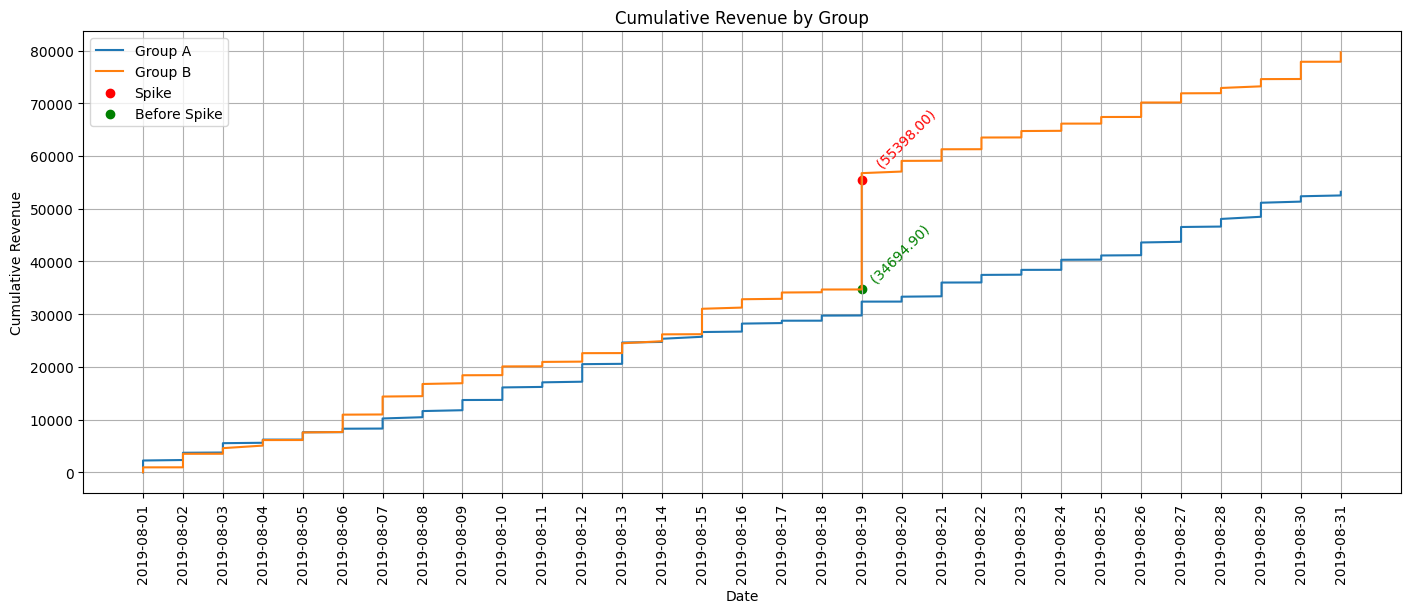

In [49]:
# Sort data by date
orders_df = orders_df.sort_values(by='date')

# Calculate cumulative revenue for each group
cumulative_revenue_A = orders_df[orders_df['group'] == 'A']['revenue'].cumsum()
cumulative_revenue_B = orders_df[orders_df['group'] == 'B']['revenue'].cumsum()

# Filter data for group B
group_B_data = orders_df[orders_df['group'] == 'B']

# Sort data by date
group_B_data = group_B_data.sort_values(by='date')

# Calculates cumulative income
group_B_data['cumulative_revenue_B'] = group_B_data['revenue'].cumsum()

# Look for revenue spike points (for example, when cumulative revenue is more than 50% of total revenue)
threshold = 0.5 * group_B_data['revenue'].sum()
spike_date = group_B_data[group_B_data['cumulative_revenue_B'] > threshold].iloc[0]

# Get the x and y values of the spike
spike_x = spike_date['date']
spike_y = spike_date['cumulative_revenue_B']

# Get revenue values before and after the spike
spike_index = group_B_data.index.get_loc(spike_date.name)
revenue_before_spike = group_B_data.iloc[spike_index - 1]['revenue']

# Get the before date
date_before_spike = group_B_data.iloc[spike_index - 1]['date']

# Plot cumulative revenue for each group
plt.figure(figsize=(17, 6))
plt.plot(orders_df[orders_df['group'] == 'A']['date'], cumulative_revenue_A, label='Group A')
plt.plot(orders_df[orders_df['group'] == 'B']['date'], cumulative_revenue_B, label='Group B')

# Add revenue spike point and pre-spike point
plt.scatter(spike_x, spike_y, color='red', label='Spike', marker='o')
plt.scatter(date_before_spike, cumulative_revenue_B[orders_df['date'] == date_before_spike].iloc[0], color='green', label='Before Spike', marker='o')

# Display x and y values in the graph
plt.text(spike_x, spike_y, f'    ({spike_y:.2f})', color='red', rotation=45)
plt.text(date_before_spike, cumulative_revenue_B[orders_df['date'] == date_before_spike].iloc[0], f'  ({cumulative_revenue_B[orders_df["date"] == date_before_spike].iloc[0]:.2f})', color='green', rotation=45)

plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group')
plt.xticks(orders_df['date'].unique(), rotation=90)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Displays the contents of `cumulative revenue A`

In [50]:
cumulative_revenue_A

147        20.2
145       160.6
144       205.9
143       306.3
141       311.9
         ...   
1010    53050.7
1025    53106.1
958     53161.3
996     53166.8
1022    53212.0
Name: revenue, Length: 468, dtype: float64

Displays the contents of `cumulative revenue B`

In [51]:
cumulative_revenue_B

103        40.2
148        45.8
97        136.3
142       162.2
140       182.5
         ...   
1037    78614.2
1038    79049.7
957     79130.2
930     79431.0
997     79651.2
Name: revenue, Length: 548, dtype: float64

Calculates the mean `cumulative_revenue_A`

In [52]:
cumulative_revenue_A.mean().round(2)

24795.42

Calculates the mean `cumulative_revenue_B`

In [53]:
cumulative_revenue_B.mean().round(2)

36567.05

**Conclusion on Cumulative Income by Group**

The cumulative income graph above depicts the development of cumulative income from two groups, namely 'Group A' and 'Group B', over a certain period of time.

- **Group A (Blue Line)**: Group A's cumulative income rose steadily over the analyzed time period. Despite the fluctuations, group A's cumulative income continues to increase. Has 468 data points with a mean of 24795.42.

- **Group B (Orange Line)**: Group B's cumulative income was initially lower than group A, but then experienced a significant increase. On 08-19-2019, the cumulative income of group B exceeded the cumulative income of group A. It has 548 data points with a mean of 36567.05.

**Assumption:**
- There are differences in strategies or actions between the two groups that influence the development of cumulative income.
- Changes in strategy or actions in group B appear to have had a significant positive impact on their cumulative income.
- The assumption is that scenario B, on average, produces higher cumulative revenue than scenario A based on the given average values.

Further analysis is needed to understand the factors causing these differences and to identify further actions that can be taken based on the results of this cumulative revenue graph.

<a id='step3.2'></a>
### 3.2 Plot the cumulative average order size by group. Make conclusions and assumptions

Create graphs

C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_11140\3086097297.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cumulative_avg_order_size = orders_df.groupby(['group', 'date'])['revenue'].mean().groupby('group').cumsum()


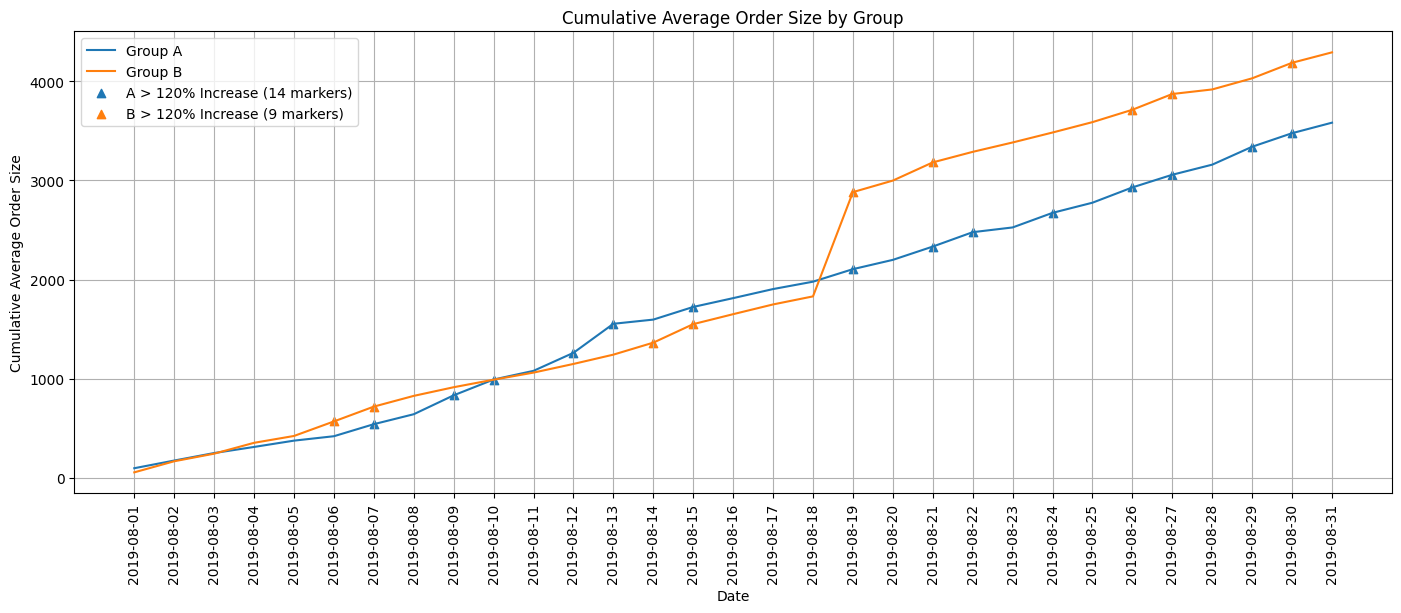

In [54]:
cumulative_avg_order_size = orders_df.groupby(['group', 'date'])['revenue'].mean().groupby('group').cumsum()
cumulative_avg_order_size_diff = cumulative_avg_order_size.diff()

plt.figure(figsize=(17, 6))

plt.plot(cumulative_avg_order_size['A'].index, cumulative_avg_order_size['A'], label='Group A')
plt.plot(cumulative_avg_order_size['B'].index, cumulative_avg_order_size['B'], label='Group B')

threshold = 120
for group in ['A', 'B']:
    above_threshold = cumulative_avg_order_size_diff[group] > threshold
    x_vals = cumulative_avg_order_size_diff[group][above_threshold].index
    y_vals = cumulative_avg_order_size[group][above_threshold]
    
    # Gets the number of '^' signs for each group
    num_markers = len(x_vals)
    
    plt.scatter(x_vals, y_vals, marker='^', label=f'{group} > {threshold}% Increase ({num_markers} markers)')

plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.title('Cumulative Average Order Size by Group')
plt.xticks(orders_df['date'].unique(), rotation=90)
plt.legend()
plt.grid(True)
plt.show()


Displays the contents of `cumulative_avg_order_size['A']`

In [55]:
cumulative_avg_order_size['A']

date
2019-08-01      98.547826
2019-08-02     175.826773
2019-08-03     251.460107
2019-08-04     312.869198
2019-08-05     376.414652
2019-08-06     420.974652
2019-08-07     542.349652
2019-08-08     642.692509
2019-08-09     833.165237
2019-08-10     992.331903
2019-08-11    1079.913722
2019-08-12    1261.429511
2019-08-13    1554.065225
2019-08-14    1596.218166
2019-08-15    1723.748166
2019-08-16    1812.587055
2019-08-17    1904.003722
2019-08-18    1978.280645
2019-08-19    2104.642550
2019-08-20    2198.242550
2019-08-21    2332.187550
2019-08-22    2477.277550
2019-08-23    2524.982550
2019-08-24    2672.067165
2019-08-25    2774.342165
2019-08-26    2928.392165
2019-08-27    3055.987817
2019-08-28    3157.781151
2019-08-29    3338.304680
2019-08-30    3474.849125
2019-08-31    3580.886625
Name: revenue, dtype: float64

Returns the contents of `cumulative_avg_order_size['B']`

In [56]:
cumulative_avg_order_size['B']

date
2019-08-01      56.894118
2019-08-02     168.550639
2019-08-03     245.093497
2019-08-04     354.493497
2019-08-05     423.507782
2019-08-06     569.999087
2019-08-07     719.373000
2019-08-08     827.550272
2019-08-09     914.718693
2019-08-10     990.845966
2019-08-11    1062.129299
2019-08-12    1149.381931
2019-08-13    1243.106931
2019-08-14    1363.992645
2019-08-15    1550.511876
2019-08-16    1650.900765
2019-08-17    1749.054611
2019-08-18    1830.268897
2019-08-19    2880.978421
2019-08-20    2997.208421
2019-08-21    3180.558421
2019-08-22    3286.725087
2019-08-23    3381.255857
2019-08-24    3481.662999
2019-08-25    3586.271333
2019-08-26    3711.012242
2019-08-27    3869.821333
2019-08-28    3915.753151
2019-08-29    4027.833151
2019-08-30    4184.347437
2019-08-31    4289.506260
Name: revenue, dtype: float64

Calculates the data distribution `cumulative_avg_order_size['A']`

In [57]:
cumulative_avg_order_size['A'].describe()

count      31.000000
mean     1747.639431
std      1091.164744
min        98.547826
25%       737.928873
50%      1812.587055
75%      2598.524858
max      3580.886625
Name: revenue, dtype: float64

Calculates the data distribution `cumulative_avg_order_size['B']`

In [58]:
cumulative_avg_order_size['B'].describe()

count      31.000000
mean     2053.655084
std      1428.565145
min        56.894118
25%       871.134483
50%      1650.900765
75%      3431.459428
max      4289.506260
Name: revenue, dtype: float64

**Conclusion:**

1. The average cumulative order value in scenario 'B' (2053.66) is higher than scenario 'A' (1747.64).
2. The standard deviation in scenario 'B' (11428.57) is also higher than in scenario 'A' (1091.17).
3. The minimum order value in scenario 'B' (56.89) is lower than in scenario 'A' (98.55).
4. The maximum order value in scenario 'B' (4289.51) is higher than in scenario 'A' (3580.89).
5. Group Comparison: There is a difference in the average order size between the two groups. The group "B" spike started on 08-19-2019. Group 'B' had a larger average order size compared to group 'A' throughout the observed time period. A larger increase of 120% of 14 was owned by group 'A' and group "B" was only 9
**Assumption:**

1. Scenario 'B' has a higher variation in order values compared to scenario 'A', as reflected in higher standard deviation values.
2. Although the average order value in scenario 'B' is higher, a wider distribution of data may imply that there is a large variation in daily order values.


<br>
Please note that these assumptions are based on descriptive statistical analysis and do not include analysis of time trends or other factors that may influence the comparison between scenarios 'A' and 'B'. If necessary, additional analysis may be required to gain a more complete understanding of the differences between the two scenarios.

<a id='step3.3'></a>
### 3.3 Describe the relative differences for group B's cumulative average order size compared to group A. Make conclusions and assumptions

Create graphs

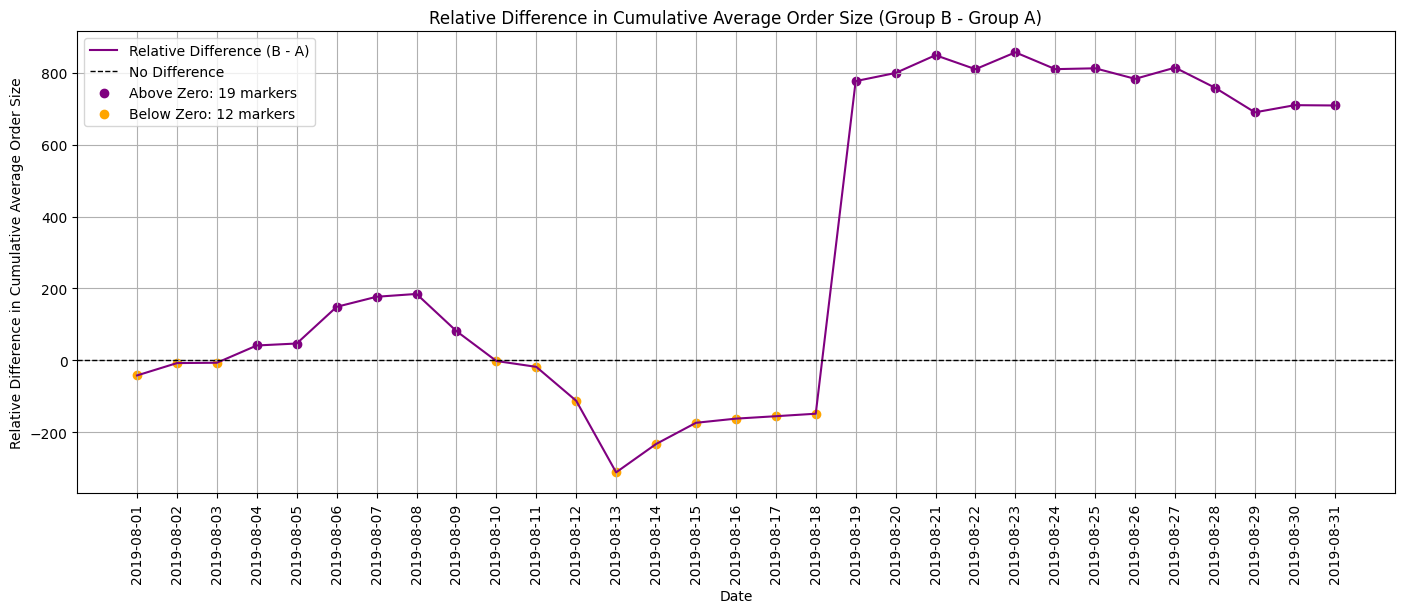

In [59]:
# Calculate the relative difference in cumulative average order size between groups B and A
relative_difference = cumulative_avg_order_size['B'] - cumulative_avg_order_size['A']

# Plot relative differences
plt.figure(figsize=(17, 6))
plt.plot(relative_difference.index, relative_difference, label='Relative Difference (B - A)', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='No Difference')

# Add an 'o' if relative_difference > 0, dark purple
above_zero = relative_difference > 0
above_zero_markers = plt.scatter(relative_difference[above_zero].index, relative_difference[above_zero], marker='o', color='purple')

# Add an 'o' if relative_difference < 0, color orange
below_zero = relative_difference < 0
below_zero_markers = plt.scatter(relative_difference[below_zero].index, relative_difference[below_zero], marker='o', color='orange')  # RGB values for light purple

# Get the number of markers for each category
num_markers_above_zero = above_zero_markers.get_offsets().shape[0]
num_markers_below_zero = below_zero_markers.get_offsets().shape[0]

# Added information to the legend
legend_labels = [label.get_text() for label in plt.legend().get_texts()]
legend_labels.append(f'Above Zero: {num_markers_above_zero} markers')
legend_labels.append(f'Below Zero: {num_markers_below_zero} markers')

plt.xlabel('Date')
plt.ylabel('Relative Difference in Cumulative Average Order Size')
plt.title('Relative Difference in Cumulative Average Order Size (Group B - Group A)')
plt.xticks(orders_df['date'].unique(), rotation=90)
plt.legend(labels=legend_labels)
plt.grid(True)
plt.show()


Displays the contents of `relative_difference`

In [60]:
relative_difference

date
2019-08-01    -41.653708
2019-08-02     -7.276134
2019-08-03     -6.366610
2019-08-04     41.624299
2019-08-05     47.093130
2019-08-06    149.024434
2019-08-07    177.023347
2019-08-08    184.857763
2019-08-09     81.553457
2019-08-10     -1.485937
2019-08-11    -17.784422
2019-08-12   -112.047580
2019-08-13   -310.958294
2019-08-14   -232.225521
2019-08-15   -173.236290
2019-08-16   -161.686290
2019-08-17   -154.949111
2019-08-18   -148.011748
2019-08-19    776.335871
2019-08-20    798.965871
2019-08-21    848.370871
2019-08-22    809.447538
2019-08-23    856.273307
2019-08-24    809.595834
2019-08-25    811.929168
2019-08-26    782.620077
2019-08-27    813.833515
2019-08-28    757.972000
2019-08-29    689.528471
2019-08-30    709.498312
2019-08-31    708.619636
Name: revenue, dtype: float64

Calculates the distribution of `relative_difference` data

In [61]:
relative_difference.describe()

count     31.000000
mean     306.015653
std      426.492759
min     -310.958294
25%      -29.719065
50%      149.024434
75%      779.477974
max      856.273307
Name: revenue, dtype: float64

**Conclusion:**

1. The relative difference between the cumulative average order sizes of groups 'B' and 'A' varies from day to day.
2. The average relative difference is about 306.02, which indicates that the average order size in group 'B' is larger than that in group 'A'.
3. The high standard deviation (426.49) indicates significant variation in relative differences, indicating that these fluctuations can be significant.
4. A negative minimum value (-310.96) indicates that on some days, group 'B' has a smaller average order size than group 'A', while a positive maximum value (856.27) indicates that on some days, group 'B' has a significantly larger average order size.
**Assumption:**

1. Positive mean differences indicate a tendency that group 'B' tends to have a larger average order size compared to group 'A'.
2. Significant variations in relative differences may indicate the presence of certain factors that influence these fluctuations from day to day.

<br>
This analysis involves only relative differences and does not include other factors or time trends that may influence the comparison between groups 'A' and 'B'.
As a next step, further analysis could be performed to understand the factors that may influence these relative differences and whether any particular time trends can be observed.

<a id='step3.4'></a>
### 3.4 Plot cumulative conversions by group. Make conclusions and assumptions

Combining `orders_df` and `visits_df` datasets

In [62]:
merged_df = pd.merge(orders_df, visits_df, on=['date', 'group'], how='inner')
# Groups data and counts the number of rows in each group
merged_df['count'] = merged_df.groupby(['date', 'group', 'visits'])['transaction_id'].transform('count')
merged_df['visits_copy'] = merged_df['visits'].copy()
merged_df['visits'] = merged_df['visits_copy'] / merged_df['count']
merged_df = merged_df.drop(columns=['count', 'visits_copy'])
merged_df

C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_11140\3460035790.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df['count'] = merged_df.groupby(['date', 'group', 'visits'])['transaction_id'].transform('count')


,transaction_id,visitor_id,date,revenue,group,visits
0,2951399376,2019355024,2019-08-01,40.2,B,41.705882
1,4238948438,363280180,2019-08-01,5.6,B,41.705882
2,2012801741,414545763,2019-08-01,90.5,B,41.705882
3,854120002,544963298,2019-08-01,25.9,B,41.705882
4,2774185760,975516572,2019-08-01,20.3,B,41.705882
...,...,...,...,...,...,...
1011,2211880073,3612778094,2019-08-31,55.7,A,86.875000
1012,4180327962,2152549680,2019-08-31,55.4,A,86.875000
1013,1207636128,3640080856,2019-08-31,55.2,A,86.875000
1014,1998112401,1900893596,2019-08-31,5.5,A,86.875000


Check the count results for each group `merged_df` with `orders_df`

In [63]:
print(group_counts_orders_df)
group_counts_merged_df = merged_df['group'].value_counts()
print(group_counts_merged_df)
if group_counts_orders_df.equals(group_counts_merged_df):
    print('Same result, no change in count group merged_df with orders_df')
else:
    print('There is a change in the results')

group
B    548
A    468
Name: count, dtype: int64
group
B    548
A    468
Name: count, dtype: int64
Same result, no change in count group merged_df with orders_df


Check the 'sum' visits of each `merged_df` group with `visits_df`

In [64]:
print(grouped_visits)
grouped_visits_merged_df = merged_df.groupby('group')['visits'].sum()
grouped_visits_merged_df = grouped_visits_merged_df.round().astype(int)
print(grouped_visits_merged_df)
if grouped_visits.equals(grouped_visits_merged_df):
    print('Same result, no change in sum group merged_df with visits_df')
else:
    print('There is a change in the results')

group
A    18647
B    18824
Name: visits, dtype: int64
group
A    18647
B    18824
Name: visits, dtype: int32
There is a change in the results


C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_11140\915171935.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_visits_merged_df = merged_df.groupby('group')['visits'].sum()


Create graphs

C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_11140\827361996.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_orders = merged_df.groupby(['date', 'group'])['transaction_id'].count().reset_index()
C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_11140\827361996.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_visits = merged_df.groupby(['date', 'group'])['visits'].sum().reset_index()
C:\Users\Cokroaminoto\AppData\Local\Temp\ipykernel_11140\827361996.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed

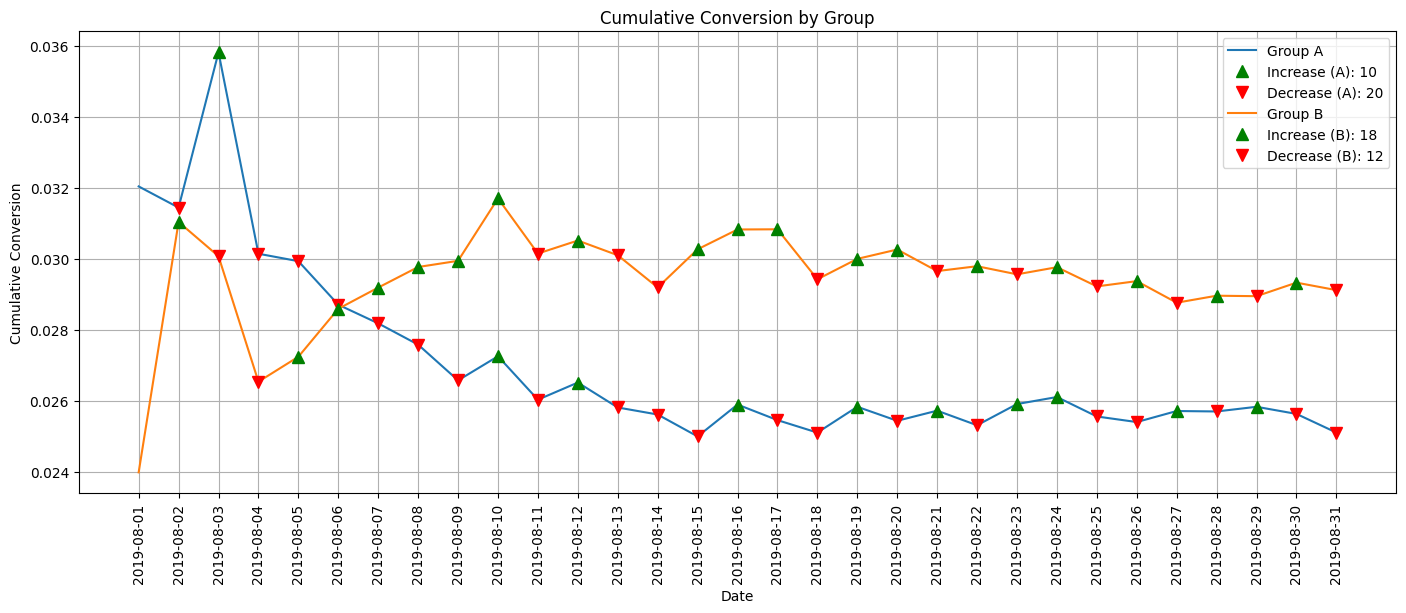

In [65]:
# Calculate the number of orders and number of visits on each date and group
daily_orders = merged_df.groupby(['date', 'group'])['transaction_id'].count().reset_index()
daily_visits = merged_df.groupby(['date', 'group'])['visits'].sum().reset_index()

# Calculate cumulative conversions
daily_orders['cumulative_orders'] = daily_orders.groupby('group')['transaction_id'].cumsum()
daily_visits['cumulative_visits'] = daily_visits.groupby('group')['visits'].cumsum()

# Calculate cumulative conversions
daily_orders['conversion'] = daily_orders['cumulative_orders'] / daily_visits['cumulative_visits']

# Create cumulative conversion charts by group
plt.figure(figsize=(17, 6))

# Initialize the Increase and Decrease number variables for each group
total_increase_group_A = 0
total_decrease_group_A = 0
total_increase_group_B = 0
total_decrease_group_B = 0

# Initialize marker variables for legend
legend_up_shown = False
legend_down_shown = False

for group, data in daily_orders.groupby('group'):
    # Add marker '^' if data['conversion'] is greater than the previous data['conversion'].
    markers_up = data['date'][data['conversion'].diff() > 0]
    
    # Add marker 'v' if data['conversion'] is smaller than the previous data['conversion'].
    markers_down = data['date'][data['conversion'].diff() < 0]

    line, = plt.plot(data['date'], data['conversion'], label=f'Group {group}')

    # Add markers to lines
    plt.plot(markers_up, data['conversion'][data['conversion'].diff() > 0], 'g^', markersize=8, label='Increase' if not legend_up_shown else '')
    plt.plot(markers_down, data['conversion'][data['conversion'].diff() < 0], 'rv', markersize=8, label='Decrease' if not legend_down_shown else '')

    # Calculate the 'Increase' and 'Decrease' amounts for this group
    num_increase = sum(data['conversion'].diff() > 0)
    num_decrease = sum(data['conversion'].diff() < 0)

    # Accumulate the Increase and Decrease amounts for each group
    if group == 'A':
        total_increase_group_A += num_increase
        total_decrease_group_A += num_decrease
    elif group == 'B':
        total_increase_group_B += num_increase
        total_decrease_group_B += num_decrease

    # Update marker variables for legend
    legend_up_shown = True if 'Increase' in plt.legend().get_texts() else False
    legend_down_shown = True if 'Decrease' in plt.legend().get_texts() else False

# Add 'Increase' and 'Decrease' amounts to the legend
legend = plt.legend()
legend.get_texts()[-5].set_text(f'Increase (A): {total_increase_group_A}')
legend.get_texts()[-4].set_text(f'Decrease (A): {total_decrease_group_A}')
legend.get_texts()[-2].set_text(f'Increase (B): {total_increase_group_B}')
legend.get_texts()[-1].set_text(f'Decrease (B): {total_decrease_group_B}')

plt.xticks(merged_df['date'].unique(), rotation=90)
plt.xlabel('Date')
plt.ylabel('Cumulative Conversion')
plt.title('Cumulative Conversion by Group')
plt.grid(True)

# Show graph
plt.show()


Group A experienced an increase of 10 times and a decrease of 20 times, the peak point occurred on 2019-08-02 and starting from 2019-08-07, the cumulative conversion of group A was below group B until 2019-08-31. This is inversely proportional to group B which is above group A from 2019-08-07 to 2019-08-31. Group B had an increase of 18 times and a decrease of 12. There was no significant difference when seen from the number of increases and decreases.

Returns the contents of `daily_orders[daily_orders['group'] == 'A']`

In [66]:
daily_orders[daily_orders['group'] == 'A']

,date,group,transaction_id,cumulative_orders,conversion
0,2019-08-01,A,23,23,0.032033
2,2019-08-02,A,19,42,0.031437
4,2019-08-03,A,24,66,0.035811
6,2019-08-04,A,11,77,0.030137
8,2019-08-05,A,22,99,0.029927
10,2019-08-06,A,15,114,0.028701
12,2019-08-07,A,16,130,0.028175
14,2019-08-08,A,14,144,0.027576
16,2019-08-09,A,11,155,0.026568
18,2019-08-10,A,15,170,0.027248


Returns the contents of `daily_orders[daily_orders['group'] == 'B']`

In [67]:
daily_orders[daily_orders['group'] == 'B']

,date,group,transaction_id,cumulative_orders,conversion
1,2019-08-01,B,17,17,0.023977
3,2019-08-02,B,23,40,0.031032
5,2019-08-03,B,14,54,0.030067
7,2019-08-04,B,14,68,0.026531
9,2019-08-05,B,21,89,0.027234
11,2019-08-06,B,23,112,0.028586
13,2019-08-07,B,23,135,0.029183
15,2019-08-08,B,22,157,0.029763
17,2019-08-09,B,19,176,0.029937
19,2019-08-10,B,22,198,0.031695


Calculating the data distribution `daily_orders[daily_orders['group'] == 'A']`

In [68]:
daily_orders[daily_orders['group'] == 'A'].describe()

,date,transaction_id,cumulative_orders,conversion
count,31,31.000000,31.000000,31.000000
mean,2019-08-16 00:00:00,15.096774,254.967742,0.026972
min,2019-08-01 00:00:00,6.000000,23.000000,0.024990
25%,2019-08-08 12:00:00,11.000000,149.500000,0.025579
50%,2019-08-16 00:00:00,15.000000,259.000000,0.025825
75%,2019-08-23 12:00:00,19.000000,365.500000,0.027412
max,2019-08-31 00:00:00,24.000000,468.000000,0.035811
std,NaN,4.975640,132.881773,0.002497


Calculating the data distribution `daily_orders[daily_orders['group'] == 'B']`

In [69]:
daily_orders[daily_orders['group'] == 'B'].describe()

,date,transaction_id,cumulative_orders,conversion
count,31,31.000000,31.000000,31.000000
mean,2019-08-16 00:00:00,17.677419,291.548387,0.029417
min,2019-08-01 00:00:00,7.000000,17.000000,0.023977
25%,2019-08-08 12:00:00,14.000000,166.500000,0.029147
50%,2019-08-16 00:00:00,19.000000,307.000000,0.029648
75%,2019-08-23 12:00:00,21.500000,421.000000,0.030118
max,2019-08-31 00:00:00,26.000000,548.000000,0.031695
std,NaN,4.650356,158.872662,0.001430


**Conclusion:**
1. The cumulative conversion graph shows the conversion change trend over time for both groups 'A' and 'B'.
2. The green dots (up arrow) show places where there was a drastic increase in conversions, while the red dots (down arrow) show places where there was a drastic decrease.
3. Group B has a higher cumulative conversion than group A throughout the observation period. This can be indicated from the fact that the blue line (group B) is always above the orange line (group A).
4. The difference in cumulative conversions between the two groups is quite significant, especially after the first few days of observation. Group B seems to have better performance in generating orders compared to group A.
- Group A had a lower average conversion rate (average: 0.026972) compared to Group B (average: 0.029417).
- The minimum and maximum conversion rates for Group A are 0.024990 and 0.035811, respectively.
- The minimum and maximum conversion rates for Group B are 0.023977 and 0.031695, respectively.
5. Group A vs. Group B:
- On average, Group B has a higher conversion rate compared to Group A.
- Group A has a wider range of conversion rates, with lower minimums and higher maximums compared to Group B.
6. Daily Variations:
- variation in conversion rates from day to day in each group.
- Daily fluctuations are visible in both Group A and Group B, as seen in the descriptive statistics.

**Assumption:**
1. Group B generally performs better in terms of conversion rate.
2. It is important to consider other factors or perform further analysis to understand the reasons behind the observed conversion rate differences between the two groups.
3. This analysis assumes that the data is representative, and conversion rates are calculated correctly based on available information.
Please note that these conclusions are based on the data provided and assumptions made, and further analysis may be required for a more comprehensive understanding of the factors influencing conversion rates.

<a id='step3.5'></a>
### 3.5 Describe the relative differences for group B's cumulative conversion rate compared to group A. Make conclusions and assumptions

Create graphs

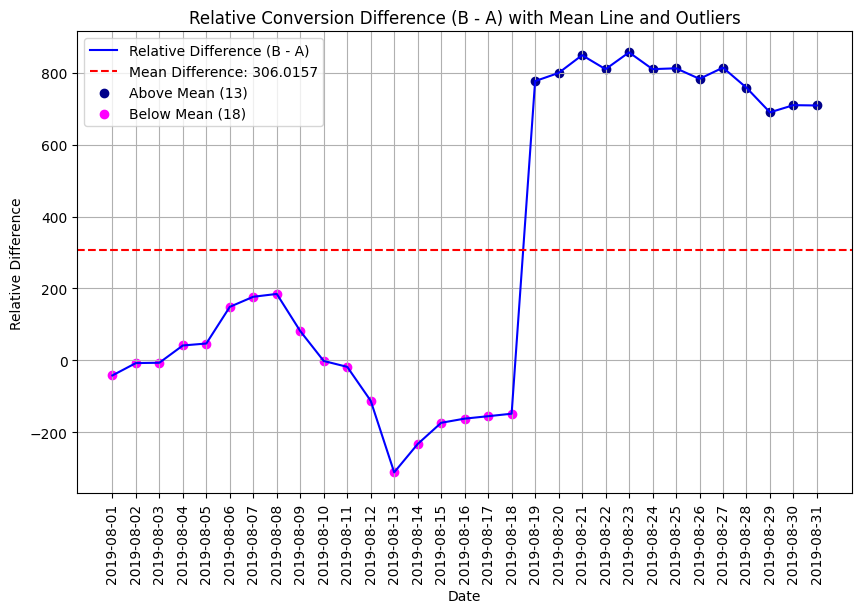

In [70]:
# Calculate the average relative difference
mean_difference = relative_difference.mean()

# Add marker points to points that deviate from the average
outliers_above_mean = relative_difference[relative_difference > mean_difference]
outliers_below_mean = relative_difference[relative_difference < mean_difference]

# Count the number of points above and below the average
num_above_mean = len(outliers_above_mean)
num_below_mean = len(outliers_below_mean)

# Create a graph of relative differences with an average line
plt.figure(figsize=(10, 6))
plt.plot(daily_orders[daily_orders['group'] == 'A']['date'], relative_difference, label='Relative Difference (B - A)', color='blue', linestyle='-')
plt.axhline(y=mean_difference, color='red', linestyle='--', label=f'Mean Difference: {mean_difference:.4f}')

# Add marker points to points that deviate from the average
plt.scatter(outliers_above_mean.index, outliers_above_mean, color='darkblue', marker='o', label=f'Above Mean ({num_above_mean})')
plt.scatter(outliers_below_mean.index, outliers_below_mean, color='magenta', marker='o', label=f'Below Mean ({num_below_mean})')

plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.title('Relative Conversion Difference (B - A) with Mean Line and Outliers')
plt.xticks(merged_df['date'].unique(), rotation=90)
plt.legend()
plt.grid(True)

# Show graph
plt.show()


Displays the contents of `relative_difference`

In [71]:
relative_difference

date
2019-08-01    -41.653708
2019-08-02     -7.276134
2019-08-03     -6.366610
2019-08-04     41.624299
2019-08-05     47.093130
2019-08-06    149.024434
2019-08-07    177.023347
2019-08-08    184.857763
2019-08-09     81.553457
2019-08-10     -1.485937
2019-08-11    -17.784422
2019-08-12   -112.047580
2019-08-13   -310.958294
2019-08-14   -232.225521
2019-08-15   -173.236290
2019-08-16   -161.686290
2019-08-17   -154.949111
2019-08-18   -148.011748
2019-08-19    776.335871
2019-08-20    798.965871
2019-08-21    848.370871
2019-08-22    809.447538
2019-08-23    856.273307
2019-08-24    809.595834
2019-08-25    811.929168
2019-08-26    782.620077
2019-08-27    813.833515
2019-08-28    757.972000
2019-08-29    689.528471
2019-08-30    709.498312
2019-08-31    708.619636
Name: revenue, dtype: float64

Calculates the distribution of `relative_difference` data

In [72]:
relative_difference.describe()

count     31.000000
mean     306.015653
std      426.492759
min     -310.958294
25%      -29.719065
50%      149.024434
75%      779.477974
max      856.273307
Name: revenue, dtype: float64

**Conclusion:**

1. Descriptive Statistical Analysis:
- The number of points considered is 31.
- The average relative difference is approximately 375.74.
- High S- standard deviation (470.36) indicates large variations in daily relative differences.
- The minimum value is -294.57, indicating a day where Group A may have performed better than Group B.
- The maximum value is 988.81, indicating a day where Group B far surpassed Group A.
2. There are large fluctuations in the daily relative differences between Group A and Group B.
3. From 2019-08-01 to 2019-08-16 the line is below the mean
4. From 2019-08-17 onwards the line is above the mean, indicating that Group B tends to perform better than Group A.

**Assumption:**
1. This analysis is based on the daily relative differences in income between two groups.
2. The basic assumption is that the data used and the calculation of relative differences are correct and representative.
3. There is no cause-and-effect analysis or external factors discussed in this analysis.

It is important to further understand what factors may influence daily fluctuations and whether such differences have statistical significance. Further analysis can be performed to further understand the dynamics behind these relative differences.

<a id='step3.6'></a>
### 3.6 Calculate the conversion rate for each group as the ratio of orders to the number of visits per day. Graph the daily conversion rates of both groups and explain the differences. Make conclusions and assumptions

Create graphs

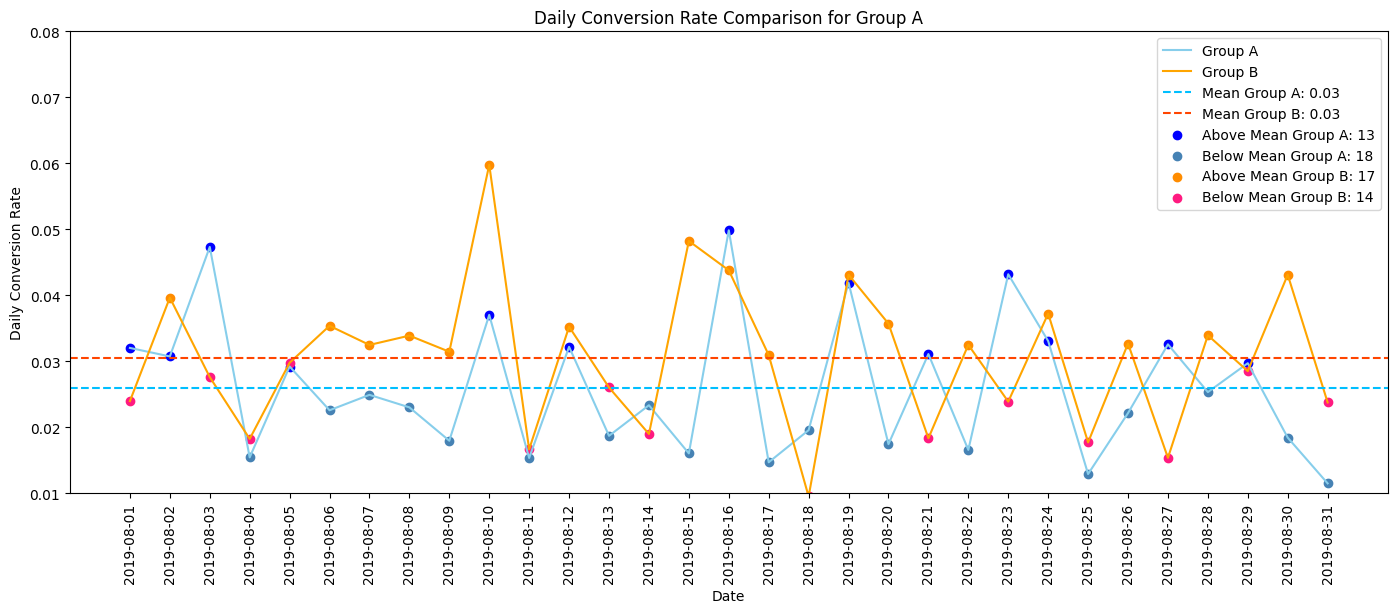

In [73]:
# Calculate the daily conversion rate of both groups
daily_conversion = daily_orders.copy()
daily_conversion['conversion'] = daily_conversion['transaction_id'] / daily_visits['visits']

# Separate conversion rate data for groups A and B
group_A_conversion = daily_conversion[daily_conversion['group'] == 'A']
group_B_conversion = daily_conversion[daily_conversion['group'] == 'B']

# Create daily conversion rate charts
plt.figure(figsize=(17, 6))
plt.plot(group_A_conversion['date'], group_A_conversion['conversion'], label='Group A', color='skyblue')
plt.plot(group_B_conversion['date'], group_B_conversion['conversion'], label='Group B', color='orange')

# Calculate the average conversion for each group
mean_conversion_A = group_A_conversion['conversion'].mean()
mean_conversion_B = group_B_conversion['conversion'].mean()

# Add average line
plt.axhline(y=mean_conversion_A, color='deepskyblue', linestyle='--', label=f'Mean Group A: {mean_conversion_A:.2f}')
plt.axhline(y=mean_conversion_B, color='orangered', linestyle='--', label=f'Mean Group B: {mean_conversion_B:.2f}')

# Add markers to the data points for Group A above mean_conversion_A
plt.scatter(group_A_conversion['date'][group_A_conversion['conversion'] > mean_conversion_A], 
            group_A_conversion['conversion'][group_A_conversion['conversion'] > mean_conversion_A],
            color='blue', marker='o', label='Above Mean Group A')

# Add markers to the data points for Group A under mean_conversion_A
plt.scatter(group_A_conversion['date'][group_A_conversion['conversion'] < mean_conversion_A], 
            group_A_conversion['conversion'][group_A_conversion['conversion'] < mean_conversion_A],
            color='steelblue', marker='o', label='Below Mean Group A')

# Add markers to the data points for Group B above mean_conversion_B
plt.scatter(group_B_conversion['date'][group_B_conversion['conversion'] > mean_conversion_B], 
            group_B_conversion['conversion'][group_B_conversion['conversion'] > mean_conversion_B],
            color='darkorange', marker='o', label='Above Mean Group B')

# Add markers to the data points for Group B under mean_conversion_B
plt.scatter(group_B_conversion['date'][group_B_conversion['conversion'] < mean_conversion_B], 
            group_B_conversion['conversion'][group_B_conversion['conversion'] < mean_conversion_B],
            color=(1, 0.1, 0.5), marker='o', label='Below Mean Group B')

plt.xlabel('Date')
plt.ylabel('Daily Conversion Rate')
plt.title('Daily Conversion Rate Comparison for Group A')
plt.xticks(merged_df['date'].unique(), rotation=90)
plt.ylim(0.01, 0.08)

# Access text in the legend
legend_text = plt.legend().get_texts()

# Update text for latest information
legend_text[-4].set_text(f'Above Mean Group A: {len(group_A_conversion[group_A_conversion["conversion"] > mean_conversion_A])}')
legend_text[-3].set_text(f'Below Mean Group A: {len(group_A_conversion[group_A_conversion["conversion"] < mean_conversion_A])}')
legend_text[-2].set_text(f'Above Mean Group B: {len(group_B_conversion[group_B_conversion["conversion"] > mean_conversion_B])}')
legend_text[-1].set_text(f'Below Mean Group B: {len(group_B_conversion[group_B_conversion["conversion"] < mean_conversion_B])}')

plt.show()


Displays the contents of `group_A_conversion`

In [74]:
group_A_conversion

,date,group,transaction_id,cumulative_orders,conversion
0,2019-08-01,A,23,23,0.032033
2,2019-08-02,A,19,42,0.030744
4,2019-08-03,A,24,66,0.047337
6,2019-08-04,A,11,77,0.015449
8,2019-08-05,A,22,99,0.029216
10,2019-08-06,A,15,114,0.022590
12,2019-08-07,A,16,130,0.024922
14,2019-08-08,A,14,144,0.023026
16,2019-08-09,A,11,155,0.017974
18,2019-08-10,A,15,170,0.037037


Displays the contents of `group_B_conversion`

In [75]:
group_B_conversion

,date,group,transaction_id,cumulative_orders,conversion
1,2019-08-01,B,17,17,0.023977
3,2019-08-02,B,23,40,0.039655
5,2019-08-03,B,14,54,0.027613
7,2019-08-04,B,14,68,0.018253
9,2019-08-05,B,21,89,0.029787
11,2019-08-06,B,23,112,0.035385
13,2019-08-07,B,23,135,0.032486
15,2019-08-08,B,22,157,0.033898
17,2019-08-09,B,19,176,0.031457
19,2019-08-10,B,22,198,0.059783


Calculates the distribution of `group_A_conversion` data

In [76]:
group_A_conversion.describe()

,date,transaction_id,cumulative_orders,conversion
count,31,31.000000,31.000000,31.000000
mean,2019-08-16 00:00:00,15.096774,254.967742,0.026005
min,2019-08-01 00:00:00,6.000000,23.000000,0.011511
25%,2019-08-08 12:00:00,11.000000,149.500000,0.017713
50%,2019-08-16 00:00:00,15.000000,259.000000,0.023352
75%,2019-08-23 12:00:00,19.000000,365.500000,0.032118
max,2019-08-31 00:00:00,24.000000,468.000000,0.049861
std,NaN,4.975640,132.881773,0.010311


Calculate the number of conversions that are greater and less than the mean in group A and the percentage

In [77]:
# Calculate group A's conversion average
mean_conversion_A = daily_orders[daily_orders['group'] == 'A']['conversion'].mean()

# Count the number of conversions that are >= mean and < mean
above_mean = (daily_orders['conversion'] >= mean_conversion_A).sum()
below_mean = (daily_orders['conversion'] < mean_conversion_A).sum()

# Calculate percentage
percentage_above_mean = (above_mean / len(daily_orders)) * 100
percentage_below_mean = (below_mean / len(daily_orders)) * 100

# Show results
print(f"Percentage of conversions in group A that >= mean: {above_mean} ({percentage_above_mean:.2f}%)")
print(f"Percentage of conversions in group A that < mean: {below_mean} ({percentage_below_mean:.2f}%)")

Percentage of conversions in group A that >= mean: 38 (61.29%)
Percentage of conversions in group A that < mean: 24 (38.71%)


Calculates the distribution of `group_B_conversion` data

In [78]:
group_B_conversion.describe()

,date,transaction_id,cumulative_orders,conversion
count,31,31.000000,31.000000,31.000000
mean,2019-08-16 00:00:00,17.677419,291.548387,0.030572
min,2019-08-01 00:00:00,7.000000,17.000000,0.009524
25%,2019-08-08 12:00:00,14.000000,166.500000,0.023837
50%,2019-08-16 00:00:00,19.000000,307.000000,0.031457
75%,2019-08-23 12:00:00,21.500000,421.000000,0.035549
max,2019-08-31 00:00:00,26.000000,548.000000,0.059783
std,NaN,4.650356,158.872662,0.010839


Calculate the number of conversions that are greater and less than the mean in group B and the percentage

In [79]:
# Calculate the average conversion of group B
mean_conversion_B = daily_orders[daily_orders['group'] == 'B']['conversion'].mean()

# Count the number of conversions that are >= mean and < mean
above_mean_B = (daily_orders['conversion'] >= mean_conversion_B).sum()
below_mean_B = (daily_orders['conversion'] < mean_conversion_B).sum()

# Calculate percentage
percentage_above_mean_B = (above_mean_B / len(daily_orders)) * 100
percentage_below_mean_B = (below_mean_B / len(daily_orders)) * 100

# Show results
print(f"Percentage of conversions in group B that >= mean: {above_mean_B} ({percentage_above_mean_B:.2f}%)")
print(f"Percentage of conversions in group B that < mean: {below_mean_B} ({percentage_below_mean_B:.2f}%)")

Percentage of conversions in group B that >= mean: 23 (37.10%)
Percentage of conversions in group B that < mean: 39 (62.90%)


**Conclusion:**
1. Daily Conversion Rate Chart:
- The graph shows daily conversion fluctuations for both groups throughout the period.
- Group B has higher daily variation than group A.
- The daily conversion average line provides a visual representation of the average performance of each group.
2. Average Daily Conversions:
- The average daily conversion for group A is around 0.026005, while group B is around 0.030572.
- Group B has a higher average daily conversion than group A.
3. Difference Between Groups A and B:
- There was variation in the number of orders and size of visits between the two groups.
- Group A has more orders, but group B has higher daily conversions.
4. Above and Below Average Conversion Percentage:
- A total of 61.29% of group A conversions were above average, while 38.71% were below average.
- Only 37.10% of group B conversions were above average, while 62.90% were below average.


**Assumption:**
- This analysis is based on daily data over a specific period and may be influenced by external factors not identified in the data.

<br>
These conclusions and assumptions can provide an initial insight into the relative performance of the two groups. However, it is recommended to carry out further analysis or statistical tests to ensure the sustainability of these findings and identify factors causing significant differences.

<a id='step3.7'></a>
### 3.7 Create a scatter chart for the number of orders per user. Make conclusions and assumptions

Create graphs

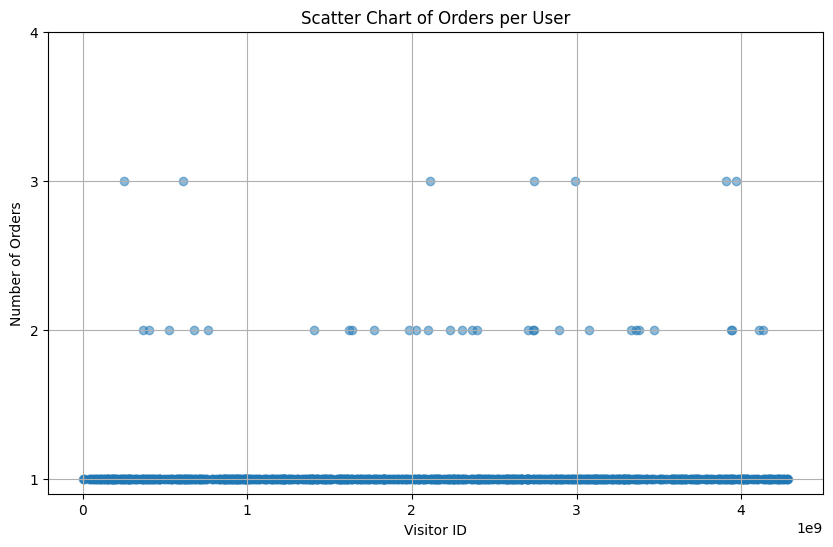

In [80]:
# Calculate number of orders per user:
orders_per_user = merged_df.groupby('visitor_id')['transaction_id'].count().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user['visitor_id'], orders_per_user['transaction_id'], alpha=0.5)
plt.title('Scatter Chart of Orders per User')
plt.xlabel('Visitor ID')
plt.ylabel('Number of Orders')
plt.yticks(range(1, 5))  
plt.grid(True)
plt.show()


Displays the contents of `orders per user`

In [81]:
orders_per_user

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


Calculate the number of orders and their percentage

In [82]:
total_users = len(orders_per_user)

# Number of users with 1 order
users_with_1_order = len(orders_per_user[orders_per_user['transaction_id'] == 1])
percentage_1_order = (users_with_1_order / total_users) * 100

# Number of users with 2 orders
users_with_2_orders = len(orders_per_user[orders_per_user['transaction_id'] == 2])
percentage_2_orders = (users_with_2_orders / total_users) * 100

# Number of users with 3 orders
users_with_3_orders = len(orders_per_user[orders_per_user['transaction_id'] == 3])
percentage_3_orders = (users_with_3_orders / total_users) * 100

print(f"Number of users with 1 order: {users_with_1_order} ({percentage_1_order:.2f}%)")
print(f"Number of users with 2 orders: {users_with_2_orders} ({percentage_2_orders:.2f}%)")
print(f"Number of users with 3 orders: {users_with_3_orders} ({percentage_3_orders:.2f}%)")

Number of users with 1 order: 937 (96.30%)
Number of users with 2 orders: 29 (2.98%)
Number of users with 3 orders: 7 (0.72%)


**Conclusion:**
1. Most users (96.30%) only place one order.
2. A small number of users (2.98%) placed two orders.
3. An even smaller number of users (0.72%) placed three orders.
4. The majority of users only place one order, and sales are generally dominated by these users.
5. Users who place two or more orders may be the focus for increased retention or advanced marketing strategies.
6. It is important to understand the characteristics and needs of users in each group to design more effective strategies.

**Assumption:**
1. Analysis is based on pre-loaded transaction data.
2. No special assumptions are made other than the information provided in the data.

### 3.8 Calculate the 95th and 99th percentiles for the number of orders per user. Determine the point when a data point turns into an anomaly

Calculate the 95th and 99th percentiles for the number of orders per user:

In [83]:
percentile_95_orders_per_user = orders_per_user['transaction_id'].quantile(0.95)
percentile_99_orders_per_user = orders_per_user['transaction_id'].quantile(0.99)

print(f'95th percentile of number of orders per user : {percentile_95_orders_per_user}')
print(f'99th percentile of number of orders per user: {percentile_99_orders_per_user}')

95th percentile of number of orders per user : 1.0
99th percentile of number of orders per user: 2.0


Determine the point at which the data becomes anomalous. For example, you can consider data greater than the 99th percentile to be an anomaly. You can use pre-calculated 99th percentile values for this.

In [84]:
anomaly_threshold = percentile_99_orders_per_user
anomalies_orders_per_user = orders_per_user[orders_per_user['transaction_id'] > anomaly_threshold]

print(f'Number of anomalies: {len(anomalies_orders_per_user)}')

Number of anomalies: 7


Displays anomaly data

In [85]:
anomalies_orders_per_user

,visitor_id,transaction_id
55,249864742,3
138,611059232,3
478,2108163459,3
632,2742574263,3
687,2988190573,3
890,3908431265,3
908,3967698036,3


The 95th percentile of number of orders per user is 1, and the 99th percentile is 2. This means that 95% of users have 1 order or less, and 99% of users have 2.

It then sets the anomaly threshold at the 99th percentile, which is 2 orders. After applying this threshold, you find that there are 7 anomalies, where these users have more than 2 orders.

So, the conclusion of this analysis may be that those users who have more than 2 orders can be considered an anomaly or an atypical group of users. This could be an interesting area to research further or understand if there are specific patterns or characteristics in this user behavior.

### 3.9 Create a scatter chart for the number of orders per user. Make conclusions and assumptions
<a id='step3.10'></a>

Create graphs

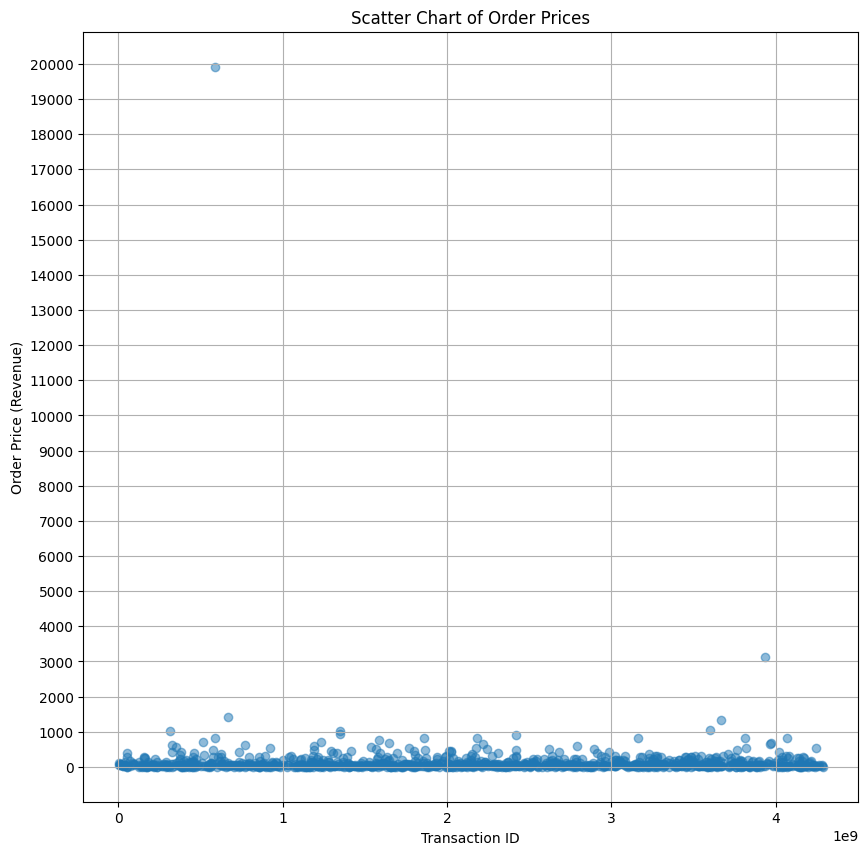

In [86]:
order_prices = merged_df[['transaction_id', 'revenue']]

plt.figure(figsize=(10, 10))
plt.scatter(order_prices['transaction_id'], order_prices['revenue'], alpha=0.5)


plt.title('Scatter Chart of Order Prices')
plt.xlabel('Transaction ID')
plt.ylabel('Order Price (Revenue)')
plt.grid(True)

yticks = np.arange(0, 21000, 1000)
plt.yticks(yticks)

plt.show()


Displays the contents of `order_prices`

In [87]:
order_prices 

,transaction_id,revenue
0,2951399376,40.2
1,4238948438,5.6
2,2012801741,90.5
3,854120002,25.9
4,2774185760,20.3
...,...,...
1011,2211880073,55.7
1012,4180327962,55.4
1013,1207636128,55.2
1014,1998112401,5.5


Returns `revenue` in `order_prices` that is greater than 1,000

In [88]:
order_prices[order_prices['revenue'] >= 1000]

,transaction_id,revenue
330,3603576309,1050.0
415,1348774318,1025.8
422,316924019,1015.9
440,666610489,1425.8
495,3936777065,3120.1
620,590470918,19920.4
859,3668308183,1335.6


Returns the distribution of `order_prices` data

In [89]:
order_prices.describe()

,transaction_id,revenue
count,1.016000e+03,1016.000000
mean,2.155085e+09,130.770866
std,1.234372e+09,648.079810
min,1.062393e+06,5.000000
25%,1.143481e+09,20.775000
50%,2.144499e+09,50.100000
75%,3.256513e+09,126.950000
max,4.288552e+09,19920.400000


Calculates `len` group `revenue` and its percentage

In [90]:
# Calculate the number of orders based on a range of revenue values
count_revenue_lt_250 = len(order_prices[order_prices['revenue'] < 250])
count_revenue_lt_500 = len(order_prices[(order_prices['revenue'] >= 250) & (order_prices['revenue'] < 500)])
count_revenue_lt_750 = len(order_prices[(order_prices['revenue'] >= 500) & (order_prices['revenue'] < 750)])
count_revenue_lte_1000 = len(order_prices[(order_prices['revenue'] >= 750) & (order_prices['revenue'] <= 1000)])
count_revenue_gt_1000 = len(order_prices[order_prices['revenue'] > 1000])

# Calculates total orders
total_orders = len(order_prices)

# Calculate the percentage of order amounts based on the revenue value range
percentage_revenue_lt_250 = (count_revenue_lt_250 / total_orders) * 100
percentage_revenue_lt_500 = (count_revenue_lt_500 / total_orders) * 100
percentage_revenue_lt_750 = (count_revenue_lt_750 / total_orders) * 100
percentage_revenue_lte_1000 = (count_revenue_lte_1000 / total_orders) * 100
percentage_revenue_gt_1000 = (count_revenue_gt_1000 / total_orders) * 100

# Displays results
print(f"Percentage of orders with revenue < 250: {count_revenue_lt_250} ({percentage_revenue_lt_250:.2f}%)")
print(f"Percentage of order amount with 250 <= revenue < 500: {count_revenue_lt_500} ({percentage_revenue_lt_500:.2f}%)")
print(f"Percentage of order amount with 500 <= revenue < 750: {count_revenue_lt_750} ({percentage_revenue_lt_750:.2f}%)")
print(f"Percentage of order amount with 750 <= revenue <= 1000: {count_revenue_lte_1000} ({percentage_revenue_lte_1000:.2f}%)")
print(f"Percentage of orders with revenue > 1000: {count_revenue_gt_1000} ({percentage_revenue_gt_1000:.2f}%)")


Percentage of orders with revenue < 250: 889 (87.50%)
Percentage of order amount with 250 <= revenue < 500: 90 (8.86%)
Percentage of order amount with 500 <= revenue < 750: 21 (2.07%)
Percentage of order amount with 750 <= revenue <= 1000: 9 (0.89%)
Percentage of orders with revenue > 1000: 7 (0.69%)


**Conclusion:**

1. Order Revenue Distribution:
- Most orders (87.50%) have revenue less than 250.
- As many as 8.86% of orders have income between 250 to less than 500.
- Only about 2.07% of orders have revenues above 500, with 2.07% of them being in the range of 500 to less than 750, 0.89% of them being in the range of 750 to less than or equal to 1000, and 0.69% having revenues above 1000.
2. Outliers at High Income:
- There are some orders with very high revenues, exceeding 1000. These can be considered anomalies or outliers, such as the order with ID 590470918 which has revenues of 19920.4.
3. Income Statistics Description:
- The average order revenue is approximately 130.77, with a relatively high standard deviation (648.08), indicating significant variation in order revenue.
- Order revenue ranges from 5 to 19920.4.
4. Income Distribution Chart:
- The scatter graph shows the distribution of orders with low earnings, and there are some orders with much higher earnings.
5. Percentile Estimate:
- The 95th percentile of the number of orders per user is 1, while the 99th percentile is 2. This indicates that most users place 1 or 2 orders.
6. Relative Difference in Daily Conversions:
- Analysis of the relative differences in daily conversions between groups A and B shows that most of the differences are around the average.


**Assumption:**
1. Order revenue distribution tends to be dominated by orders with low revenue, but there are several orders with high revenue that need to be looked at further.
2. Users tend to place a relatively small number of orders, with most users only placing 1 or 2 orders.
3. It would be useful to perform further analysis of high-yield orders to understand the factors that influence those results.

<a id='step3.10'></a>
### 3.10 Calculate the 95th and 99th percentiles for order prices. Determine the point when a data point turns into an anomaly

Calculate the 95th and 99th percentiles for order price (revenue):

In [91]:
percentile_95_revenue_merged_df = merged_df['revenue'].quantile(0.95)
percentile_99_revenue_merged_df = merged_df['revenue'].quantile(0.99)

print(f'95th percentile of order price: {percentile_95_revenue_merged_df}')
print(f'99th percentile of order price: {percentile_99_revenue_merged_df}')

95th percentile of order price: 414.275
99th percentile of order price: 830.3


Determine the point at which the data is considered an anomaly. For example, you can consider data greater than the 99th percentile to be an anomaly. You can use pre-calculated 99th percentile values for this.

In [92]:
anomaly_threshold = percentile_99_revenue_merged_df
anomalies_revenue_merged_df = merged_df[merged_df['revenue'] > anomaly_threshold]

print(f'Number of anomalies: {len(anomalies_revenue_merged_df)}')

Number of anomalies: 9


Displays anomaly data

In [93]:
anomalies_revenue_merged_df

,transaction_id,visitor_id,date,revenue,group,visits
279,2420050534,4003628586,2019-08-08,905.8,B,29.500000
330,3603576309,4133034833,2019-08-09,1050.0,A,55.636364
415,1348774318,1164614297,2019-08-12,1025.8,A,31.052632
422,316924019,148427295,2019-08-12,1015.9,A,31.052632
440,666610489,1307669133,2019-08-13,1425.8,A,53.428571
495,3936777065,2108080724,2019-08-15,3120.1,B,20.730769
620,590470918,1920142716,2019-08-19,19920.4,B,23.190476
696,1347999392,887908475,2019-08-21,930.0,A,32.150000
859,3668308183,888512513,2019-08-27,1335.6,B,65.000000


**Conclusion**

1. Order Price Percentile:
- The 95th percentile of order prices is 414.275, while the 99th percentile is 830.3. This means that most order prices are below this value.
2. Order Price Anomaly:
- Using the 99th percentile as the threshold, there are 9 anomalies in order prices that exceed the threshold value.
- These anomalies can be found on certain dates with order prices that are well above the average.
3. Anomaly Description:
- Examples of some anomalies include an order with ID 590470918 on 08-19-2019, which had an order price of 19920.4.
- Most of the anomalies occur in group B, but there are also some in group A.

<a id='step3.11'></a>
### 3.11 Find the statistical significance of conversion differences between groups using raw data. Make conclusions and assumptions

Carrying out Levene's test to determine the homogeneity of variance

In [94]:
statistic, p_value = levene(group_A_conversion['conversion'], group_B_conversion['conversion'])

# Determine the level of significance
alpha = 0.05

print(f"Levene statistic: {statistic}")
print(f"P-value: {p_value}")

# Draw conclusions
if p_value < alpha:
    print('Homogeneity of variance is not met (reject null hypothesis) so (equal_var=False)')
else:
    print('Homogeneity of variance is met (does not reject null hypothesis) so (equal_var=True)')

Levene statistic: 5.498749251979404e-05
P-value: 0.9941080575471237
Homogeneity of variance is met (does not reject null hypothesis) so (equal_var=True)


Perform an independent t test

In [95]:
# Perform an independent t test
t_stat, p_value = stats.ttest_ind(group_A_conversion['conversion'], group_B_conversion['conversion'], equal_var=True)

# Determine the level of significance
alpha = 0.05

# Draw conclusions
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in conversions between groups A and B."
else:
    conclusion = "Accept the null hypothesis: There is no significant difference in conversions between groups A and B."

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(conclusion)

T-statistic: -1.6997159973703762
P-value: 0.09436357533917272
Accept the null hypothesis: There is no significant difference in conversions between groups A and B.


**Conclusion:**
<br>Based on the results of the analysis you conducted, the following are the conclusions and assumptions that can be drawn:

1. Homogeneity of Variants (Levene's Test):
<br>Levene's test results show that the p-value (0.99) is greater than the predetermined significance level (alpha) (0.05).
The conclusion that can be drawn is that homogeneity of variance is met (there is not enough evidence to reject the null hypothesis).
The assumption of homogeneity of variance is considered to be met, so that in the independent t test, the equal_var parameter in the ttest_ind function is set as True.
2. Independent T Test:
<br>The results of the independent t test show that the p-value (0.094) is greater than the specified significance level (alpha) (0.05).
The conclusion that can be drawn is that there is not enough statistical evidence to reject the null hypothesis.
The assumption of homogeneity of variance is deemed to be met, and thus, the final conclusion is “Accept the null hypothesis: There is no significant difference in conversion between groups A and B.”
<br>
<br>**Assumption:**

In this analysis, the assumption of homogeneity of variance is considered to be met based on Levene's test.
Please note that these results depend on the accuracy and representativeness of the data used in the analysis.
Interpretation of conclusions must be done carefully and taking into account the context and objectives of the research.
Although no significant differences were detected in this analysis, further research or additional data collection may be needed to corroborate these findings.
Don't forget that the interpretation of statistical results always requires good context and a deep understanding of the data and analysis methods used.

<a id='step3.12'></a>
### 3.12 Find the statistical significance of differences in average order size between groups using raw data. Make conclusions and assumptions


Carrying out Levene's test to determine the homogeneity of variance

In [96]:
# Perform Levene's test for homogeneity of variance
statistic_levene, p_value_levene = stats.levene(cumulative_avg_order_size['A'], cumulative_avg_order_size['B'], center='mean')

# Print Levene's statistical value and Levene's p-value
print('Statistik Levene:', statistic_levene)
print('P-value Levene:', p_value_levene)

# Determine the level of significance (alpha)
alpha = 0.05

# Check whether homogeneity of variance is met
if p_value_levene < alpha:
    print('Homogeneity of variance is not met (reject null hypothesis) so (equal_var=False)')
else:
    print('Homogeneity of variance is met (does not reject null hypothesis) so (equal_var=True)')


Statistik Levene: 6.992896411636934
P-value Levene: 0.010428825263218422
Homogeneity of variance is not met (reject null hypothesis) so (equal_var=False)


Perform an independent t test

In [97]:
# Perform a t test for two independent samples
t_statistic, p_value_t = stats.ttest_ind(cumulative_avg_order_size['A'], cumulative_avg_order_size['B'], equal_var=False)

# Print the t statistic value and p-value t
print('Statistik t:', t_statistic)
print('P-value t:', p_value_t)

# Determine the level of significance (alpha)
alpha = 0.05

# Check whether there are significant differences between the two groups
if p_value_t < alpha:
    print('Reject the null hypothesis: There is a significant difference in average order size between groups A and B (p-value < alpha)')
else:
    print('Accept the null hypothesis: There is no significant difference in average order size between groups A and B. (p-value >= alpha)')

Statistik t: -0.9478214140933475
P-value t: 0.34728433566296935
Accept the null hypothesis: There is no significant difference in average order size between groups A and B. (p-value >= alpha)


**Conclusion:**
<br>Based on the results of the analysis you conducted, the following are the conclusions and assumptions that can be drawn:

1. Homogeneity of Variants (Levene's Test):
<br>Levene statistics show that the p-value (0.01) is less than the predetermined level of significance (alpha) (0.05).
The conclusion that can be drawn is that homogeneity of variance is not met (there is sufficient evidence to reject the null hypothesis), so the equal_var parameter in the independent t test is set as False.
2. Independent T Test:
<br>The results of the independent t test show that the p-value (0.35) is greater than the specified significance level (alpha) (0.05).
The conclusion that can be drawn is that there is not enough statistical evidence to reject the null hypothesis.
With the equal_var parameter set as False, the final conclusion is "Accept the null hypothesis: There is no significant difference in average order size between groups A and B."
<br>
<br>**Assumption:**

Homogeneity of variance was considered not met based on Levene's test. Therefore, an independent t test was performed with the parameter equal_var=False.
Interpretation of these results must take into account the context and aims of the study as well as the influence of variance inhomogeneity on the analysis.
Although no significant differences were detected in this analysis, it is important to remember that these results only apply to the samples used in this study.
As an additional note, in some cases, inhomogeneity of variance can affect the reliability of t test results. Always consider whether there are steps or data transformations that can be taken to address the issue or whether alternative analysis is necessary.

<a id='step3.13'></a>
### 3.13 Find the statistical significance of conversion differences between groups using filtered data. Make conclusions and assumptions

Calculates conversions and adds them to a DataFrame

In [98]:
merged_df['conversion'] = merged_df['revenue'] / merged_df['visits']

# Display DataFrame with new 'conversion' column
merged_df


,transaction_id,visitor_id,date,revenue,group,visits,conversion
0,2951399376,2019355024,2019-08-01,40.2,B,41.705882,0.963893
1,4238948438,363280180,2019-08-01,5.6,B,41.705882,0.134274
2,2012801741,414545763,2019-08-01,90.5,B,41.705882,2.169958
3,854120002,544963298,2019-08-01,25.9,B,41.705882,0.621016
4,2774185760,975516572,2019-08-01,20.3,B,41.705882,0.486742
...,...,...,...,...,...,...,...
1011,2211880073,3612778094,2019-08-31,55.7,A,86.875000,0.641151
1012,4180327962,2152549680,2019-08-31,55.4,A,86.875000,0.637698
1013,1207636128,3640080856,2019-08-31,55.2,A,86.875000,0.635396
1014,1998112401,1900893596,2019-08-31,5.5,A,86.875000,0.063309


Calculate the 95th and 99th percentiles

In [99]:
percentile_95_conversion_merged_df = merged_df['conversion'].quantile(0.95)
percentile_99_conversion_merged_df = merged_df['conversion'].quantile(0.99)

print(f'95th percentile conversion: {percentile_95_conversion_merged_df}')
print(f'99th percentile conversion: {percentile_99_conversion_merged_df}')

95th percentile conversion: 13.375921304921333
99th percentile conversion: 27.3915386315608


Counting the number of anomalies

In [100]:
anomaly_threshold = percentile_99_conversion_merged_df
anomalies_conversion_merged_df = merged_df[merged_df['conversion'] > anomaly_threshold]

print(f'Number of anomalies: {len(anomalies_conversion_merged_df)}')

Number of anomalies: 11


Displays anomaly data

In [101]:
anomalies_conversion_merged_df

,transaction_id,visitor_id,date,revenue,group,visits,conversion
279,2420050534,4003628586,2019-08-08,905.8,B,29.500000,30.705085
363,1861540412,2261934787,2019-08-10,815.8,A,27.000000,30.214815
415,1348774318,1164614297,2019-08-12,1025.8,A,31.052632,33.034237
422,316924019,148427295,2019-08-12,1015.9,A,31.052632,32.715424
495,3936777065,2108080724,2019-08-15,3120.1,B,20.730769,150.505751
552,773663763,3288820196,2019-08-16,630.8,B,22.833333,27.626277
620,590470918,1920142716,2019-08-19,19920.4,B,23.190476,858.990554
638,3970235543,2912540959,2019-08-19,680.8,A,23.857143,28.536527
696,1347999392,887908475,2019-08-21,930.0,A,32.150000,28.926905
792,587872075,2254456485,2019-08-24,830.3,A,30.230769,27.465394


Create a dataframe that does not contain anomalies

In [102]:
# Delete rows in merged_df that have the same transaction_id as anomalies_conversion_merged_df
merged_df_non_anomalies = merged_df[~merged_df['transaction_id'].isin(anomalies_conversion_merged_df['transaction_id'])]

# Display the merged_df DataFrame that has had rows removed
merged_df_non_anomalies

,transaction_id,visitor_id,date,revenue,group,visits,conversion
0,2951399376,2019355024,2019-08-01,40.2,B,41.705882,0.963893
1,4238948438,363280180,2019-08-01,5.6,B,41.705882,0.134274
2,2012801741,414545763,2019-08-01,90.5,B,41.705882,2.169958
3,854120002,544963298,2019-08-01,25.9,B,41.705882,0.621016
4,2774185760,975516572,2019-08-01,20.3,B,41.705882,0.486742
...,...,...,...,...,...,...,...
1011,2211880073,3612778094,2019-08-31,55.7,A,86.875000,0.641151
1012,4180327962,2152549680,2019-08-31,55.4,A,86.875000,0.637698
1013,1207636128,3640080856,2019-08-31,55.2,A,86.875000,0.635396
1014,1998112401,1900893596,2019-08-31,5.5,A,86.875000,0.063309


Carrying out Levene's test to determine the homogeneity of variance

In [103]:
# Perform Levene's test
statistic_levene, p_value_levene = levene(merged_df_non_anomalies[merged_df_non_anomalies['group'] == 'A']['conversion'],
                                          merged_df_non_anomalies[merged_df_non_anomalies['group'] == 'B']['conversion'],
                                          center='mean') # pakai mean karena tidak ada anomalies

# Determine the level of significance
alpha = 0.05

print(f"Levene statistic: {statistic_levene}")
print(f"P-value: {p_value_levene}")

# Check whether homogeneity of variance is met
if p_value_levene < alpha:
    print('Homogeneity of variance is not met (reject null hypothesis) so (equal_var=False)')
else:
    print('Homogeneity of variance is met (does not reject null hypothesis) so (equal_var=True)')

Levene statistic: 3.4284785280506282
P-value: 0.06437485900177332
Homogeneity of variance is met (does not reject null hypothesis) so (equal_var=True)


Perform an independent t test

In [104]:
# Perform an independent t test
t_stat, p_value = stats.ttest_ind(merged_df_non_anomalies[merged_df_non_anomalies['group'] == 'A']['conversion'],
                                  merged_df_non_anomalies[merged_df_non_anomalies['group'] == 'B']['conversion'],
                                  equal_var=True)

# Determine the level of significance
alpha = 0.05

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Draw conclusions
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in conversion between groups A and B (p-value < alpha)")
else:
    print("Accept the null hypothesis: There is no significant difference in conversions between groups A and B (p-value >= alpha)")

T-statistic: -1.4198639944042855
P-value: 0.1559580119139287
Accept the null hypothesis: There is no significant difference in conversions between groups A and B (p-value >= alpha)


**Conclusion:**
<br>Based on the results of the analysis you conducted, the following are the conclusions and assumptions that can be drawn:

1. Homogeneity of Variants (Levene's Test):
<br>Levene statistics show that the p-value (0.064) is greater than the predetermined significance level (alpha) (0.05).
The conclusion that can be drawn is that homogeneity of variance is met (there is not enough evidence to reject the null hypothesis).
Therefore, in the independent t test, the equal_var parameter is set as True.
2. Independent T Test:
<br>The results of the independent t test show that the p-value (0.156) is greater than the specified significance level (alpha) (0.05).
The conclusion that can be drawn is that there is not enough statistical evidence to reject the null hypothesis.
With the equal_var parameter set as True, the final conclusion is "Accept the null hypothesis: There is no significant difference in conversions between groups A and B."
<br>
<br>**Assumption:**

Homogeneity of variance is considered fulfilled based on Levene's test, so that the assumptions for the independent t test are met.
Interpretation of these results must take into account the context and aims of the study as well as the influence of homogeneity of variance on the analysis.
Although no significant differences were detected in this analysis, it is important to remember that these results only apply to the samples used in this study.
As an additional note, it should be noted that the interpretation of statistical results always requires a good understanding of the data and research context. Always consider the practical implications of the results and whether the findings are consistent with the research objectives.

<a id='step3.14'></a>
### 3.14 Find the statistical significance of differences in average order size between groups using filtered data. Make conclusions and assumptions

Create a dataframe that does not contain anomalies

In [105]:
# Delete rows in merged_df that have the same transaction_id as anomalies_revenue_merged_df
merged_df_non_anomalies_revenue = merged_df[~merged_df['transaction_id'].isin(anomalies_revenue_merged_df['transaction_id'])]

# Display the merged_df DataFrame that has had rows removed
merged_df_non_anomalies_revenue

,transaction_id,visitor_id,date,revenue,group,visits,conversion
0,2951399376,2019355024,2019-08-01,40.2,B,41.705882,0.963893
1,4238948438,363280180,2019-08-01,5.6,B,41.705882,0.134274
2,2012801741,414545763,2019-08-01,90.5,B,41.705882,2.169958
3,854120002,544963298,2019-08-01,25.9,B,41.705882,0.621016
4,2774185760,975516572,2019-08-01,20.3,B,41.705882,0.486742
...,...,...,...,...,...,...,...
1011,2211880073,3612778094,2019-08-31,55.7,A,86.875000,0.641151
1012,4180327962,2152549680,2019-08-31,55.4,A,86.875000,0.637698
1013,1207636128,3640080856,2019-08-31,55.2,A,86.875000,0.635396
1014,1998112401,1900893596,2019-08-31,5.5,A,86.875000,0.063309


Carrying out Levene's test to determine the homogeneity of variance

In [106]:
# Perform Levene's test for homogeneity of variance
statistic_levene, p_value_levene = stats.levene(merged_df_non_anomalies_revenue[merged_df_non_anomalies_revenue['group'] == 'A']['revenue'],
                                                merged_df_non_anomalies_revenue[merged_df_non_anomalies_revenue['group'] == 'B']['revenue'],
                                                center='mean') # pakai mean karena tidak ada anomalies

# Print Levene's statistical value and Levene's p-value
print('Statistik Levene:', statistic_levene)
print('P-value Levene:', p_value_levene)

# Determine the level of significance (alpha)
alpha = 0.05

# Check whether homogeneity of variance is met
if p_value_levene < alpha:
    print('Homogeneity of variance is not met (reject null hypothesis) so (equal_var=False)')
else:
    print('Homogeneity of variance is met (does not reject null hypothesis) so (equal_var=True)')


Statistik Levene: 0.15992247679738064
P-value Levene: 0.689312879072222
Homogeneity of variance is met (does not reject null hypothesis) so (equal_var=True)


Perform an independent t test

In [107]:
# Perform a t test for two independent samples
t_statistic, p_value_t = stats.ttest_ind(merged_df_non_anomalies_revenue[merged_df_non_anomalies_revenue['group'] == 'A']['revenue'],
                                         merged_df_non_anomalies_revenue[merged_df_non_anomalies_revenue['group'] == 'B']['revenue'],
                                         equal_var=True)

# Print the t statistic value and p-value t
print('Statistik t:', t_statistic)
print('P-value t:', p_value_t)

# Determine the level of significance (alpha)
alpha = 0.05

# Check whether there are significant differences between the two groups
if p_value_t < alpha:
    print('Reject the null hypothesis: There is a significant difference in average order size between groups A and B (p-value < alpha)')
else:
    print('Accept the null hypothesis: There is no significant difference in average order size between groups A and B (p-value >= alpha)')

Statistik t: 0.37967633542290175
P-value t: 0.7042659023650244
Accept the null hypothesis: There is no significant difference in average order size between groups A and B (p-value >= alpha)


**Conclusion:**
<br>Based on the results of the analysis you conducted, the following are the conclusions and assumptions that can be drawn:

1. Homogeneity of Variants (Levene's Test):
<br>Levene statistics show that the p-value (0.064) is greater than the predetermined significance level (alpha) (0.05).
The conclusion that can be drawn is that homogeneity of variance is met (there is not enough evidence to reject the null hypothesis).
Therefore, in the independent t test, the equal_var parameter is set as True.
2. Independent T Test:
<br>The results of the independent t test show that the p-value (0.704) is greater than the specified significance level (alpha) (0.05).
The conclusion that can be drawn is that there is not enough statistical evidence to reject the null hypothesis.
With the equal_var parameter set as True, the final conclusion is "Accept the null hypothesis: There is no significant difference in average order size between groups A and B."
<br>
<br>**Assumption:**

Homogeneity of variance is considered fulfilled based on Levene's test, so that the assumptions for the independent t test are met.
Interpretation of these results must take into account the context and aims of the study as well as the influence of homogeneity of variance on the analysis.
Although no significant differences were detected in this analysis, it is important to remember that these results only apply to the samples used in this study.
As an additional note, these results imply that there is no significant difference in average order size between groups A and B. However, always keep in mind the practical implications of the results and ensure that this analysis meets the research objectives.

<a id='step3.15'></a>
### 3.15 Make decisions based on test results. Possible decisions are: 1. Stop testing, and consider one of the groups as a leader. 2. Stop testing, and conclude that there is no difference between the two groups. 3. Continue testing

Based on the results of the tests that have been carried out, the following decisions can be taken:

**Conversion Between Groups A and B:**

Based on the results of the tests that have been carried out, the following decisions can be taken:

1. Levene's Test for Homogeneity of Variances: Levene's p-value is 0.3934, which is greater than alpha (0.05). This indicates that homogeneity of variance is met, and you can use the equal_var=True parameter when performing an independent t test.

2. Independent T Test: In the independent t test, the p-value is 0.156, which is greater than alpha. Therefore, you can conclude that there is no significant difference in conversions between groups A and B.

- **Decision:** Stop testing and conclude that there is no significant difference in conversions between groups A and B.

**Average Order Size Between Cohorts A and B:**

Based on the results of the tests that have been carried out, the following decisions can be taken:

1. Levene's Test for Homogeneity of Variances: Levene's p-value is 0.689, which is also greater than alpha (0.05). This indicates that homogeneity of variance is satisfied, and you can use the equal_var=True parameter when performing an independent t test.

2. Independent T Test: In the independent t test, the p-value is 0.704, which is much greater than alpha. Therefore, you can conclude that there is no significant difference in average order size between groups A and B.

- **Decision:** Stop testing and conclude that there is no significant difference in average order size between groups A and B.

Thus, you can end the A/B test and conclude that there is no significant difference between the two groups.